In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 80)
pd.set_option('display.max_colwidth', -1)

## read, head, info

In [3]:
movie_df = pd.read_csv('./data/clean_movie_plus_credit.csv', encoding='raw_unicode_escape')

In [4]:
movie_df.fillna('',inplace=True)

In [5]:
# movie_df['cast_name'] = movie_df['cast_name'].apply(lambda x: str(x.split(',')[:1])[1:-1] if len(x.split(',')) > 2 else str(x))

In [6]:
# movie_df['cast_name'].value_counts()

In [7]:
movie_df.head()

budget                                    genres      id  \
0  237000000  Action,Adventure,Fantasy,Science Fiction  19995    
1  300000000  Adventure,Fantasy,Action                  285      
2  245000000  Action,Adventure,Crime                    206647   
3  250000000  Action,Crime,Drama,Thriller               49026    
4  260000000  Action,Adventure,Science Fiction          49529    

                                                                                                                                                                                                                             keywords  \
0  culture clash,future,space war,space colony,society,space travel,futuristic,romance,space,alien,tribe,alien planet,cgi,marine,soldier,battle,love affair,anti war,power relations,mind and soul,3d                                   
1  ocean,drug abuse,exotic island,east india trading company,love of one's life,traitor,shipwreck,strong woman,ship,alliance,calypso,afterlife,fighter,pirate,swashbuckler,aftercreditsstinger                                          
2  spy,based on novel,secret agent,sequel,mi6,british secret service,united kingdom                                                                                                                                                     
3  dc comics,crime fighter,terrorist,secret identity,burglar,hostage drama,time bomb,gotham city,vigilante,cover-up,superhero,villainess,tragic hero,terrorism,destruction,catwoman,cat burglar,imax,flood,criminal underworld,batman   
4  based on novel,mars,medallion,space travel,princess,alien,steampunk,martian,escape,edgar rice burroughs,alien race,superhuman strength,mars civilization,sword and planet,19th century,3d                                            

  original_language                            original_title  \
0  en                Avatar                                     
1  en                Pirates of the Caribbean: At World's End   
2  en                Spectre                                    
3  en                The Dark Knight Rises                      
4  en                John Carter                                

                                                                                                                                                                                                                                                                                                                                                                                                                                       overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.                                                                                                                                                                                                                                                                
1  Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.                                                                                                                                                                                                                                                               
2  A cryptic message from BondÃÂ¢ÃÂÃÂs past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.                                                                                                                                                                                    
3  Following the death of District Attorney Harvey Dent, Batman assumes respons

This dataset was got from TMDB, where all of it's data were got from the user's input, so there might be an error due to human's error while the user was inputing the data or the user's lack of knowledge about the movies. I have do some cleaning and merged the data into one csv so it's easier to work with.

In [8]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 26 columns):
budget                      4803 non-null int64
genres                      4803 non-null object
id                          4803 non-null int64
keywords                    4803 non-null object
original_language           4803 non-null object
original_title              4803 non-null object
overview                    4803 non-null object
popularity                  4803 non-null float64
production_companies        4803 non-null object
production_countries        4803 non-null object
release_date                4803 non-null object
revenue                     4803 non-null int64
runtime                     4803 non-null float64
spoken_languages            4803 non-null object
status                      4803 non-null object
tagline                     4803 non-null object
title                       4803 non-null object
vote_average                4803 non-null float64
vote_count 

Columns:
    - budget                   : budget of the movies
    - genres                   : movie's genre
    - id                       : the movie's id in TMDB's database
    - keywords                 : keywords about the movie
    - original_language        : original language of the movie
    - original_title           : original title of the movie
    - overview                 : overview about the movie
    - popularity               : popularity score
    - production_companies     : production house of the movie
    - production_countries     : country where it was produced
    - release_date             : released date of the movie
    - revenue                  : worldwide revenue generated by the movie
    - runtime                  : runtime of the movie in minutes
    - spoken_languages         : languages that spoken in th movie
    - status                   : "Released" or "Rumored"
    - tagline                  : tagline of the movie
    - title                    : title of the movie
    - vote_average             : average rating the movie recieved
    - vote_count               : total vote the movie recieved
    - production_countries_iso : production country in iso format
    - spoken_languages_iso     : spoken language in iso format
    - release_year             : year the movie was released
    - release_month            : month the movie was released
    - cast_name                : name of the actors in the movie
    - producer                 : producer of the movie
    - director                 : director of the movie

## describe 

In [9]:
movie_df.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03  4803.000000    4803.000000  4.803000e+03  4803.000000   
mean   2.904504e+07  57165.484281   21.492301    8.226064e+07  106.868624    
std    4.072239e+07  88694.614033   31.816650    1.628571e+08  22.610670     
min    0.000000e+00  5.000000       0.000000     0.000000e+00  0.000000      
25%    7.900000e+05  9014.500000    4.668070     0.000000e+00  94.000000     
50%    1.500000e+07  14629.000000   12.921594    1.917000e+07  103.000000    
75%    4.000000e+07  58610.500000   28.313505    9.291719e+07  117.500000    
max    3.800000e+08  459488.000000  875.581305   2.787965e+09  338.000000    

       vote_average    vote_count  release_year  release_month  
count  4803.000000   4803.000000   4803.000000   4803.000000    
mean   6.092172      690.217989    2002.471372   6.795128       
std    1.194612      1234.585891   12.414378     3.424269       
min    0.000000      0.000000      1916.000000   1.000000       
25%    5.600000      54.000000     1999.000000   4.000000       
50%    6.200000      235.000000    2005.000000   7.000000       
75%    6.800000      737.000000    2011.000000   10.000000      
max    10.000000     13752.000000  2017.000000   12.000000

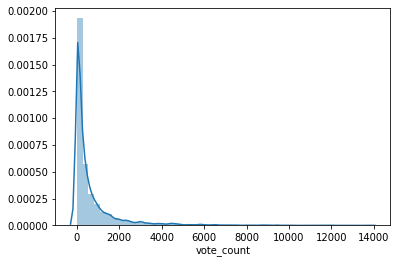

In [10]:
sns.distplot(movie_df['vote_count'])

From description above we can see that there are movie's that have 0 USD budget, 0 revenue, 0 runtime, that seems weird, but I assume it was due to human's error when the users were inputing the data. We will check about it later.<br>
While popularity, vote_average, and vote_count also have 0 value, I don't think it's weird, that might because that movie was really not popular. Also, from that table we know that 75% of the movie are not really popular, only 25% of it get popularity's score more that 28.3 points.<br>
Movie's that get perfect score vote_average also quite interesting to be checked.

In [11]:
movie_df.describe(exclude='number')

genres keywords original_language   original_title  \
count   4803   4803     4803              4803              
unique  1175   4221     37                4801              
top     Drama           en                Out of the Blue   
freq    370    413      4505              2                 

                                                                                                                                                                                               overview  \
count   4803                                                                                                                                                                                              
unique  4803                                                                                                                                                                                              
top     When the old-old-old-fashioned vampire Vlad arrives at the hotel for an impromptu family get-together, Hotel Transylvania is in for a collision of supernatural old-school and modern day cool.   
freq    1                                                                                                                                                                                                 

       production_companies      production_countries release_date  \
count   4803                 4803                      4803          
unique  3693                 469                       3281          
top                          United States of America  2006-01-01    
freq    352                  2977                      10            

       spoken_languages    status tagline     title production_countries_iso  \
count   4803             4803      4803    4803      4803                      
unique  487              3         3945    4800      469                       
top     English          Released          The Host  US                        
freq    3200             4795      844     2         2977                      

       spoken_languages_iso cast_name producer director  
count   4803                 4803      4803     4803     
unique  544                  4758      3229     2289     
top     en                                               
freq    3171                 46        1060     241

From descriptions above we know that drama is the most produced genre, Paramount Pictures produced more movie that others company, most movie were produce in USA and in English, Steven Spielberg and Neal H. Moritz were director and producer that produce most movie in this dataset.<br><br>

There are two movie that seem share a same name, I'll check about it too.<br><br>

Status column seem's not very important because it has 4795 row that have 'Released' value. Only 8 columns have different value, so I'll just drop this column.<br>

## drop original_title

In [12]:
movie_df[['title','original_title']].apply(lambda x: False if x[0]==x[1] else print(x), axis=1)

title             Shin Godzilla                                                           
original_title    ÃÂ£ÃÂÃÂ·ÃÂ£ÃÂÃÂ³ÃÂ£ÃÂÃÂ»ÃÂ£ÃÂÃÂ´ÃÂ£ÃÂÃÂ¸ÃÂ£ÃÂÃÂ©
Name: 97, dtype: object
title             Fantastic 4: Rise of the Silver Surfer
original_title    4: Rise of the Silver Surfer          
Name: 215, dtype: object
title             Asterix at the Olympic Games      
original_title    AstÃÂÃÂ©rix aux Jeux Olympiques
Name: 235, dtype: object
title             The Flowers of War                                          
original_title    ÃÂ©ÃÂÃÂÃÂ©ÃÂÃÂµÃÂ¥ÃÂÃÂÃÂ¤ÃÂ¸ÃÂÃÂ©ÃÂÃÂµ
Name: 317, dtype: object
title             Evolution       
original_title    ÃÂÃÂvolution
Name: 474, dtype: object
title             Arthur and the Invisibles
original_title    Arthur et les Minimoys   
Name: 488, dtype: object
title             Top Cat Begins                    
original_title    Don Gato: El inicio de la pandilla
Name: 492, dtype: object
ti

Name: 3839, dtype: object
title             The Other Conquest
original_title    La otra conquista 
Name: 3844, dtype: object
title             Troll Hunter
original_title    Trolljegeren
Name: 3845, dtype: object
title             Stranded   
original_title    Dawn Patrol
Name: 3858, dtype: object
title             March of the Penguins  
original_title    La Marche de l'empereur
Name: 3861, dtype: object
title             City of God   
original_title    Cidade de Deus
Name: 3866, dtype: object
title             The Hunt
original_title    Jagten  
Name: 3870, dtype: object
title             The Opposite Sex
original_title    Opposite Sex    
Name: 3874, dtype: object
title             The Class     
original_title    Entre les murs
Name: 3876, dtype: object
title             Maria Full of Grace               
original_title    MarÃÂÃÂ­a, llena eres de gracia
Name: 3880, dtype: object
title             Coming Home             
original_title    ÃÂ¥ÃÂ½ÃÂÃÂ¦ÃÂÃÂ¥
Name: 3892, 

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
        ...  
4753    False
4754    False
4755    False
4756    False
4757    False
4758    False
4759    False
4760    False
4761    False
4762    False
4763    False
4764    False
4765    False
4766    False
4767    False
4768    False
4769    False
4770    False
4771    False
4772    False
4773  

Original title seems writen in difference language so I'll just drop them.

In [13]:
movie_df.drop('original_title',axis=1,inplace=True)

## drop status

In [14]:
movie_df.drop('status',axis=1,inplace=True)

## Check Movies which title is 'Out of Blue'

In [15]:
movie_df[movie_df['title'] == 'Out of the Blue']

budget genres     id  \
3647  0       Drama  39269   
3693  0       Drama  10844   

                                                                          keywords  \
3647  punk,independent film,coming of age,teenage girl,alcoholic father              
3693  new zealand,gun rampage,police,independent film,neighbor,person running amok   

     original_language  \
3647  en                 
3693  en                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 overview  \
3647  Dennis Hopper is a hard-drinking truck driver who loses control of his truck under the influence and slams it into a busload of screaming children. After serving his five year jail sentence, Hopper finds his daughter, Cebe (Linda Manz), the love of his live, grown into a rebellious punk in a backwater town, having barely been looked after by her junkie mon (Sharron Farrell). Cebe's hopes of once again becoming a "normal" family painfully proves to be doomed, as she desperately tries to hold everyone together. Hopper's loose, naturalistic style and sympathetic, yet critical attitude infuses the drama with a painful power that finally erupts in a devastating and thrillling conclusion.   
3693  Ordinary people find extraordinary courage in the face of madness. On 13ÃÂ¢ÃÂÃÂ14 November 1990 that madness came to Aramoana, a small New Zealand seaside town, in the form of a lone gunman with a high-powered semi-automatic rifle. As he stalked his victims the terrified and confused residents were trapped for 24 hours while a handful of under-resourced and under-armed local policemen risked their lives trying to find him and save the survivors. Based on true events.                                                                                                                                                                                                                          

      popularity production_companies production_countries release_date  \
3647  0.679351    Robson Street        Canada               1980-05-01    
3693  0.706355                         New Zealand          2006-10-12    

      revenue  runtime spoken_languages  \
3647  0        94.0     English           
3693  0        103.0    English           

                                                tagline            title  \
3647  A harrowing drama from the director of Easy Rider  Out of the Blue   
3693  The true story of a small town massacre            Out of the Blue   

      vote_average  vote_count production_countries_iso spoken_languages_iso  \
3647  6.5           17          CA                       en                    
3693  5.9           18          NZ                       en                    

      release_year  release_month  \
3647  1980          5               
3693  2006          10              

                                                                                                                                                                                                                                                                                         cast_name  \
3647  Dennis Hopper,Raymond Burr,Sharon Farrell,Linda Manz,Don Gordon                                                                                                                                                                            

It seems both of them are a completely different movie that only share the same name.

## 0 budget 0 revenue 0 runtime movies 

In [16]:
movie_df[movie_df['budget']==0].describe()

budget             id   popularity       revenue      runtime  \
count  1037.0  1037.000000    1037.000000  1.037000e+03  1037.000000   
mean   0.0     82251.553520   5.177785     3.475736e+06  97.988428     
std    0.0     105552.659217  6.500848     1.820913e+07  26.527174     
min    0.0     20.000000      0.000000     0.000000e+00  0.000000      
25%    0.0     13768.000000   0.772668     0.000000e+00  89.000000     
50%    0.0     31064.000000   2.948576     0.000000e+00  97.000000     
75%    0.0     94352.000000   7.314796     0.000000e+00  108.000000    
max    0.0     447027.000000  74.817641    2.536254e+08  276.000000    

       vote_average   vote_count  release_year  release_month  
count  1037.000000   1037.000000  1037.000000   1037.000000    
mean   5.604436      86.354870    2003.853423   6.284474       
std    1.708292      164.818853   10.456922     3.489239       
min    0.000000      0.000000     1929.000000   1.000000       
25%    5.100000      8.000000     2000.000000   3.000000       
50%    6.000000      28.000000    2006.000000   6.000000       
75%    6.600000      95.000000    2011.000000   9.000000       
max    10.000000     2067.000000  2017.000000   12.000000

It seems most of the movies that have 0 budget really not a popular one, since 75% of the movies get only 95 vote_count and have 0 revenue, this might due to the lack of information about the movie's budget and revenue. Although, there are movies that get 2067 vote_count and get 253 millions dollars revenue.

In [17]:
movie_df[movie_df['budget']==0].describe(exclude='number')

genres keywords original_language  \
count   1037   1037     1037               
unique  356    708      26                 
top     Drama           en                 
freq    121    239      921                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                overview  \
count   1037                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
unique  1037                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
top     A story about bunch of people who live in a town in provincial France. At the center of it all is Pierre, a conceited and vain bisexual musician in his late teens who acts as a magnet, to varying degrees, for a whole array of characters - from his sister Lucie, with whom he has a heated incestuous relationship, to a city councilor with whom he participates in gay orgies. When Pierre turns up dead, Lucie investigates the reasons for his demise and charts the network of sadomasochistic relationships that crisscross the town.   
freq    1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

       production_companies      production_countries release_date  \
count   1037                 1037                      1037          
unique  711                  155                       895           
top                          United States of America  2006-01-01    
freq    261                  536                       8             

       spoken_languages tagline            title production_countries_iso  \
count   1037             1037    1037             1037                      
unique  112              592     1036             155                       
top     English                  Out of the Blue  US                        
freq    691              446     2                536                       

       spoken_languages_iso cast_name producer director  
count   1037                 1037      1037     1037     
unique  121                  1003      522      862      
top     en                                               
freq    687                  35        494      76

The descriptions about non-numerical columns doesn't seems so different, the top genre is still drama, top keywords still independent film, most of the movies still produced in USA and in English. The only differences were the production company, producers and directors.

In [18]:
movie_df[movie_df['budget']==0][['title','popularity','vote_average','vote_count','revenue','production_companies','director']]

title  popularity  vote_average  \
265   The Cat in the Hat                       18.251129   4.9            
321   The Campaign                             16.460356   5.6            
359   Alvin and the Chipmunks: The Road Chip   27.867368   5.8            
406   Arthur Christmas                         19.836830   6.7            
409   All That Jazz                            5.159407    7.3            
453   The Pink Panther                         25.450534   5.6            
463   DÃÂÃÂ©jÃÂÃÂ  Vu                    0.605645    8.0            
474   Evolution                                3.300061    6.4            
475   The Edge                                 20.632673   6.7            
489   Oceans                                   10.706613   7.3            
542   Carriers                                 12.708963   5.8            
584   Wolf                                     13.758526   6.0            
601   Rollerball                               9.306253    3.4            
691   Wild Hogs                                31.719463   5.6            
721   Kangaroo Jack                            10.292864   4.3            
735   The Tuxedo                               21.549232   5.3            
745   Miss Congeniality 2: Armed and Fabulous  19.998581   5.3            
757   Trouble with the Curve                   18.587114   6.6            
766   Garfield: A Tail of Two Kitties          16.930969   5.1            
847   Semi-Pro                                 10.449975   5.4            
881   Beloved                                  1.453765    5.9            
882   Lucky You                                6.162872    5.4            
897   Deck the Halls                           5.952527    5.1            
915   Stepmom                                  16.368283   6.9            
948   The Replacements                         14.837288   6.1            
1007  Anna Karenina                            26.387040   6.5            
1011  The Tooth Fairy                          0.716764    4.3            
1016  Kate & Leopold                           11.940711   6.0            
1023  Earth                                    1.246883    6.6            
1028  Solaris                                  24.132271   7.7            
1032  America's Sweethearts                    10.698929   5.5            
1066  Yours, Mine and Ours                     2.094151    6.2            
1069  Fat Albert                               7.157635    4.3            
1080  Across the Universe                      11.872841   7.1            
1126  Here Comes the Boom                      26.799913   6.0            
1142  Why I Did (Not) Eat My Father            5.794466    5.3            
1202  Legal Eagles                             7.519433    5.8            
1206  The Odd Life of Timothy Green            16.394452   6.5            
1225  Mickey Blue Eyes                         6.786117    5.3            
1229  A Million Ways to Die in the West        32.808675   5.8            
1248  At First Sight                           5.778724    5.9            
1250  City Hall                                3.621837    6.0            
1261  New York Minute                          10.040300   5.5            
1268  Soul Men                                 5.483671    6.3            
1269  Raise the Titanic                        1.630541    5.2            
1274  Just Visiting                            10.844882   4.8            
1282  The Hunting Party                        8.048305    6.6            
1288  The Last Shot                            6.769800    5.9            
1292  Because I Said So                        18.678415   5.8            
1301  Sgt. Bilko                               5.417787    5.5            
...          ...                                    ...    ...            
4729  Dude Where's My Dog?                     0.283970    0.0            
4730  Cheap Thrills                            10.826253   6.3   

After look at the dataframe, I think the reason why the budget 0 beside the lack of data was due to an error while inputing the data or the user's lack of knowledge about the movie's budget because I can recognized a couple movie that are quite well know and when I googled some of the movies, I can easily get the rough number of the movie's budget. Since, budget not really an important features in recommendation's model, I won't do anything about it and will drop it later after some ploting to get a little insight about it.

In [19]:
movie_df[movie_df['runtime']==0].describe()

budget             id  popularity       revenue  runtime  \
count  3.500000e+01  35.000000      35.000000   3.500000e+01  35.0      
mean   1.571429e+05  215432.257143  0.362839    7.408023e+04  0.0       
std    7.150836e+05  114531.689289  0.510986    4.382645e+05  0.0       
min    0.000000e+00  40963.000000   0.000000    0.000000e+00  0.0       
25%    0.000000e+00  105077.500000  0.039656    0.000000e+00  0.0       
50%    0.000000e+00  263503.000000  0.136721    0.000000e+00  0.0       
75%    0.000000e+00  321852.500000  0.402185    0.000000e+00  0.0       
max    4.000000e+06  380097.000000  2.028170    2.592808e+06  0.0       

       vote_average  vote_count  release_year  release_month  
count  35.000000     35.000000   35.000000     35.000000      
mean   3.345714      3.114286    2010.000000   5.285714       
std    3.029885      4.873526    5.835994      3.468950       
min    0.000000      0.000000    1991.000000   1.000000       
25%    0.000000      0.000000    2006.000000   2.000000       
50%    4.200000      1.000000    2012.000000   5.000000       
75%    5.100000      4.000000    2014.000000   7.500000       
max    10.000000     20.000000   2016.000000   12.000000

In [20]:
movie_df[movie_df['runtime']==0][['title','popularity','vote_average','vote_count','budget','revenue','production_companies','director']]

title  popularity  \
1011  The Tooth Fairy                                        0.716764     
3112  Blood Done Sign My Name                                0.397341     
3669  Should've Been Romeo                                   0.407030     
3809  How to Fall in Love                                    1.923514     
3953  Fort McCoy                                             0.384496     
3992  Sardaarji                                              0.296981     
4068  Sharkskin                                              0.027801     
4118  Hum To Mohabbat Karega                                 0.001186     
4205  N-Secure                                               0.134560     
4210  Dil Jo Bhi Kahey...                                    0.122704     
4241  The Salon                                              2.028170     
4313  Below Zero                                             1.365140     
4318  Bleeding Hearts                                        0.100533     
4322  Sex With Strangers                                     0.014406     
4328  The Vatican Exorcisms                                  0.447166     
4405  Karachi se Lahore                                      0.060003     
4435  The Horror Network Vol. 1                              0.392658     
4458  Harrison Montgomery                                    0.006943     
4502  Water & Power                                          0.350557     
4504  Light from the Darkroom                                0.012942     
4553  America Is Still the Place                             0.000000     
4558  Alleluia! The Devil's Carnival                         0.674398     
4564  Straight Out of Brooklyn                               0.161517     
4566  Diamond Ruff                                           0.165257     
4569  Mutual Friends                                         0.136721     
4571  Rise of the Entrepreneur: The Search for a Better Way  0.052942     
4581  Gory Gory Hallelujah                                   0.033883     
4584  Love in the Time of Monsters                           0.133619     
4611  The Big Swap                                           0.627763     
4620  Fighting Tommy Riley                                   0.045429     
4633  Death Calls                                            0.005883     
4657  UnDivided                                              0.010607     
4658  The Frozen                                             1.084387     
4662  Little Big Top                                         0.092100     
4729  Dude Where's My Dog?                                   0.283970     

      vote_average  vote_count   budget  revenue  \
1011  4.3           13          0        0         
3112  6.0           5           0        0         
3669  0.0           0           0        0         
3809  5.2           20          4000000  0         
3953  6.3           2           0        0         
3992  9.5           2           0        0         
4068  0.0           0           0        0         
4118  0.0           0           0        0         
4205  4.3           4           0        2592808   
4210  0.0           0           0        0         
4241  3.5           1           1500000  0         
4313  4.4           12          0        0         
4318  2.0           1           0        0         
4322  5.0           1           0        0         
4328  4.4           11          0        0         
4405  8.0           1           0        0         
4435  5.0           2           0        0         
4458  0.0           0           0        0         
4502  3.0           1           0        0         
4504  0.0           0           0        0         
4553  0.0           0           0        0         
4558  6.0           2           0        0         
4564  4.3           4           0        0         
4566  2.4           4           0        0         
4569  0.0           0           0        0         
4

There are 35 movies that have 0 minute runtime and judging from the popularity, all of those movies are not a very popular movie and that's probably the reason why it is zero.

In [21]:
movie_df[movie_df['revenue']==0].describe()

budget             id   popularity  revenue      runtime  \
count  1.427000e+03  1427.000000    1427.000000  1427.0   1427.000000   
mean   5.767431e+06  84719.239664   5.480097     0.0      98.556412     
std    1.371360e+07  110427.934012  6.368024     0.0      23.830870     
min    0.000000e+00  68.000000      0.000000     0.0      0.000000      
25%    0.000000e+00  12599.000000   1.066217     0.0      90.000000     
50%    0.000000e+00  28665.000000   3.433625     0.0      97.000000     
75%    4.000000e+06  103636.500000  7.775556     0.0      108.000000    
max    1.500000e+08  459488.000000  49.808505    0.0      276.000000    

       vote_average   vote_count  release_year  release_month  
count  1427.000000   1427.000000  1427.000000   1427.000000    
mean   5.579818      88.819902    2003.933427   6.354590       
std    1.609238      161.892058   10.421101     3.540051       
min    0.000000      0.000000     1929.000000   1.000000       
25%    5.100000      10.000000    2000.000000   3.000000       
50%    5.900000      34.000000    2006.000000   7.000000       
75%    6.500000      100.000000   2011.000000   9.000000       
max    10.000000     1671.000000  2017.000000   12.000000

In [22]:
movie_df[movie_df['revenue']==0].describe(exclude='number')

genres keywords original_language  \
count   1427   1427     1427               
unique  466    1015     27                 
top     Drama           en                 
freq    146    308      1272               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                overview  \
count   1427                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
unique  1427                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
top     A story about bunch of people who live in a town in provincial France. At the center of it all is Pierre, a conceited and vain bisexual musician in his late teens who acts as a magnet, to varying degrees, for a whole array of characters - from his sister Lucie, with whom he has a heated incestuous relationship, to a city councilor with whom he participates in gay orgies. When Pierre turns up dead, Lucie investigates the reasons for his demise and charts the network of sadomasochistic relationships that crisscross the town.   
freq    1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

       production_companies      production_countries release_date  \
count   1427                 1427                      1427          
unique  1019                 214                       1203          
top                          United States of America  2006-01-01    
freq    300                  740                       10            

       spoken_languages tagline            title production_countries_iso  \
count   1427             1427    1427             1427                      
unique  150              866     1426             214                       
top     English                  Out of the Blue  US                        
freq    942              562     2                740                       

       spoken_languages_iso cast_name producer director  
count   1427                 1427      1427     1427     
unique  169                  1386      763      1137     
top     en                                               
freq    934                  42        634      108

Looking at the descriptions above, I think the reason why there were some 0 revenue, are the same as the budget's reason.

In [23]:
movie_df[movie_df['revenue']==0][['title','popularity','vote_average','vote_count','budget','revenue','production_companies','director']]

title  popularity  vote_average  \
83    The Lovers                                     2.418535    4.8            
135   The Wolfman                                    21.214571   5.5            
265   The Cat in the Hat                             18.251129   4.9            
309   Son of the Mask                                17.815595   3.6            
376   Volcano                                        19.836124   5.2            
406   Arthur Christmas                               19.836830   6.7            
433   RED 2                                          44.343330   6.4            
453   The Pink Panther                               25.450534   5.6            
463   DÃÂÃÂ©jÃÂÃÂ  Vu                          0.605645    8.0            
467   Mighty Joe Young                               6.643778    5.9            
471   Little Nicky                                   18.335992   5.2            
474   Evolution                                      3.300061    6.4            
492   Top Cat Begins                                 0.719996    5.3            
518   Inspector Gadget                               17.561955   4.3            
536   Anna and the King                              13.327372   6.4            
584   Wolf                                           13.758526   6.0            
601   Rollerball                                     9.306253    3.4            
648   Mona Lisa Smile                                19.718544   6.5            
656   Primary Colors                                 9.110247    6.1            
660   Proof of Life                                  14.866901   6.0            
665   Lucky Numbers                                  2.952595    4.9            
685   Blades of Glory                                19.412028   5.9            
710   The Family Man                                 19.705489   6.5            
719   This Is It                                     15.798622   6.7            
721   Kangaroo Jack                                  10.292864   4.3            
733   Up Close & Personal                            4.801849    5.9            
735   The Tuxedo                                     21.549232   5.3            
745   Miss Congeniality 2: Armed and Fabulous        19.998581   5.3            
757   Trouble with the Curve                         18.587114   6.6            
762   Mercury Rising                                 18.877795   6.0            
780   Edtv                                           14.298297   5.7            
784   In the Name of the King: A Dungeon Siege Tale  15.406173   4.1            
785   Beyond Borders                                 6.523472    6.7            
789   Holy Man                                       9.265672    4.9            
796   The Ridiculous 6                               19.694695   4.9            
816   George of the Jungle                           22.573237   5.4            
829   Bowfinger                                      13.191829   6.0            
845   Instinct                                       7.386394    6.2            
857   Imagine That                                   12.340384   5.7            
861   A Very Long Engagement                         23.054510   7.1            
881   Beloved                                        1.453765    5.9            
894   Bulletproof Monk                               15.207070   5.1            
915   Stepmom                                        16.368283   6.9            
927   Christmas with the Kranks                      9.225166    5.2            
948   The Replacements                               14.837288   6.1            
955   The Peacemaker                                 15.931084   5.8            
964   For Love of the Game                           9.622345    6.3            
981   Man of the House                               6.004422    5.4            
996   Death to Smoochy                               11.329727   5.9         

## vote average 0 and 10 

In [24]:
movie_df[movie_df['vote_average']==0].describe()

budget             id  popularity       revenue     runtime  \
count  6.300000e+01  63.000000      63.000000   63.000000     63.000000    
mean   1.294683e+05  264090.603175  0.144018    219.650794    76.031746    
std    5.345653e+05  117793.943576  0.258817    1382.304273   41.215393    
min    0.000000e+00  38786.000000   0.000000    0.000000      0.000000     
25%    0.000000e+00  176210.000000  0.007759    0.000000      74.500000    
50%    0.000000e+00  288927.000000  0.036532    0.000000      89.000000    
75%    0.000000e+00  359616.000000  0.151617    0.000000      98.000000    
max    3.500000e+06  459488.000000  1.618138    10508.000000  200.000000   

       vote_average  vote_count  release_year  release_month  
count  63.0          63.000000   63.000000     63.000000      
mean   0.0           0.015873    2009.904762   6.063492       
std    0.0           0.125988    6.779272      3.392939       
min    0.0           0.000000    1983.000000   1.000000       
25%    0.0           0.000000    2007.000000   3.000000       
50%    0.0           0.000000    2013.000000   6.000000       
75%    0.0           0.000000    2014.000000   9.000000       
max    0.0           1.000000    2016.000000   12.000000

In [25]:
movie_df[movie_df['vote_average']==0][['title','popularity','vote_average','vote_count','revenue','production_companies','director']]

title  popularity  \
1464  Black Water Transit                                0.126738     
3669  Should've Been Romeo                               0.407030     
3670  Running Forever                                    0.028756     
3852  The Secret                                         0.042346     
3855  Time to Choose                                     1.618138     
3960  The Deported                                       0.194848     
3967  Four Single Fathers                                0.008263     
4051  8 Days                                             0.015295     
4065  Mi America                                         0.039007     
4068  Sharkskin                                          0.027801     
4118  Hum To Mohabbat Karega                             0.001186     
4140  To Be Frank, Sinatra at 100                        0.050625     
4186  A Beginner's Guide to Snuff                        0.060127     
4210  Dil Jo Bhi Kahey...                                0.122704     
4266  House at the End of the Drive                      0.430490     
4269  The Ballad of Gregorio Cortez                      0.592821     
4275  Queen of the Mountains                             0.077873     
4293  The Algerian                                       0.025364     
4305  Down & Out With The Dolls                          0.002386     
4307  Certifiably Jonathan                               0.047781     
4309  The Blade of Don Juan                              0.021678     
4400  Sparkler                                           0.547654     
4444  Elza                                               0.007254     
4458  Harrison Montgomery                                0.006943     
4462  The Young Unknowns                                 0.004922     
4486  Naturally Native                                   0.578798     
4487  Hav Plenty                                         0.003142     
4491  The Hadza:  Last of the First                      0.045648     
4500  Carousel of Revenge                                0.006069     
4504  Light from the Darkroom                            0.012942     
4508  The Harvest (La Cosecha)                           0.010909     
4550  The Outrageous Sophie Tucker                       0.021419     
4553  America Is Still the Place                         0.000000     
4556  El Rey de Najayo                                   0.080105     
4559  The Sound and the Shadow                           0.072359     
4569  Mutual Friends                                     0.136721     
4589  Fabled                                             0.003352     
4611  The Big Swap                                       0.627763     
4625  Midnight Cabaret                                   0.001389     
4626  Anderson's Cross                                   0.006323     
4633  Death Calls                                        0.005883     
4638  Amidst the Devil's Wings                           0.018087     
4653  Rust                                               0.399491     
4657  UnDivided                                          0.010607     
4660  Give Me Shelter                                    0.278981     
4665  Western Religion                                   0.589540     
4674  Short Cut to Nirvana: Kumbh Mela                   0.004998     
4684  American Beast                                     0.018716     
4692  Theresa Is a Mother                                0.036532     
4694  Archaeology of a Woman                             0.254659     
4698  Butterfly Girl                                     0.015189     
4699  The World Is Mine                                  0.327622     
4708  Heroes of Dirt                                     0.076647     
4710  Antarctic Edge: 70ÃÂÃÂ° South                   0.021392     
4714  An American in Hollywood                           0.015697     
4716  The Blood of My Brother: A Story of Death in Iraq  0.005256     
472

In [26]:
movie_df[movie_df['vote_average']==10].describe()

budget             id  popularity   revenue    runtime  vote_average  \
count  4.00    4.000000       4.000000    4.0       4.000000   4.0            
mean   0.25    142675.500000  0.229841    141398.0  71.500000  10.0           
std    0.50    147372.504947  0.158108    282796.0  47.822589  0.0            
min    0.00    40963.000000   0.092100    0.0       0.000000   10.0           
25%    0.00    69020.500000   0.093604    0.0       67.500000  10.0           
50%    0.00    84117.000000   0.225300    0.0       93.500000  10.0           
75%    0.25    157772.000000  0.361537    141398.0  97.500000  10.0           
max    1.00    361505.000000  0.376662    565592.0  99.000000  10.0           

       vote_count  release_year  release_month  
count  4.00        4.000000      4.000000       
mean   1.25        2004.250000   4.750000       
std    0.50        8.098354      2.629956       
min    1.00        1998.000000   1.000000       
25%    1.00        1998.000000   4.000000       
50%    1.00        2002.000000   5.500000       
75%    1.25        2008.250000   6.250000       
max    2.00        2015.000000   7.000000

In [27]:
movie_df[movie_df['vote_average']==10][['title','popularity','vote_average','vote_count','revenue','production_companies','director']]

title  popularity  vote_average  vote_count  revenue  \
3519  Stiff Upper Lips       0.356495    10.0          1           0         
4045  Dancer, Texas Pop. 81  0.376662    10.0          1           565592    
4247  Me You and Five Bucks  0.094105    10.0          2           0         
4662  Little Big Top         0.092100    10.0          1           0         

             production_companies       director  
3519                               Gary Sinyor    
4045  HSX Films,Chase Productions  Tim McCanlies  
4247                                              
4662  Fly High Films

As we can see, all of the movies that get 0 average rating, are unpopular movie and movie that get perfect average rating are movies that only get one or two votes.

## Plotting

### The most used keywords

In [28]:
#function for make set of unique values of a columns
def make_set(df,col):
    set_keywords = set()
    for keyword in df[col].str.split(',').values:
        if isinstance(keyword, float): continue
        set_keywords = set_keywords.union(keyword)
    return set_keywords

#function for make a dictionary and list of tuples from a columns, sort of value_counts()
def count_word(df, col):
    list_word = make_set(df,col)
    #make dict for count words
    keyword_count = dict()
    
    #fill dict key with words set default value to 0
    for i in list_word: keyword_count[i] = 0
    
    #loop all data from column, split all the word, set it as a list
    for list_key in df[col].str.split(','):  
        #ignore NaN
        if type(list_key) == float and pd.isnull(list_key): continue  
        #loop all the data, remove word that's not in our list_word
        for key in [s for s in list_key if s in list_word]:
            #add 1 count for every word that found
            keyword_count[key] += 1
    #______________________________________________________________________
    
    # convert sort the dictionary return as list of tupples
    keyword_occurences = sorted(keyword_count.items(), key=lambda x:x[1], reverse=True)

    #return sorted list and unsorted dict
    return keyword_occurences, keyword_count

#function for generate a wordcloud and histogram from a column, sort of count plot
def show_wordcloud_hist(df, col, title=None):
    if title==None: title= f"{col.capitalize()} popularity"
    keyword_occurences, keyword_dict = count_word(df, col)
    trunc_occurences = keyword_occurences[0:50]

    # #_____________________________________________
    # UPPER PANEL: WORDCLOUD
    fig = plt.figure(1, figsize=(18,13))
    ax1 = fig.add_subplot(2,1,1)
#     word = ','.join(df[col])
    #_______________________________________________________
    wordcloud = WordCloud(width=1000,height=300, background_color='white', relative_scaling=1, normalize_plurals=False)
    wordcloud.generate_from_frequencies(keyword_dict)
#     wordcloud.generate(word)
    ax1.imshow(wordcloud)
    ax1.axis('off')
    #_____________________________________________
    # LOWER PANEL: HISTOGRAMS
    ax2 = fig.add_subplot(2,1,2)
    y_axis = [i[1] for i in trunc_occurences]
    x_axis = [k for k,i in enumerate(trunc_occurences)]
    x_label = [i[0] for i in trunc_occurences]
    plt.xticks(rotation=85, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(x_axis, x_label)
    plt.ylabel("Count", fontsize = 18, labelpad = 10)
    ax2.bar(x_axis, y_axis, align = 'center', color='g')
    #_______________________
    plt.title(title,bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
    plt.show()

In [29]:
movie_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'title', 'vote_average', 'vote_count', 'production_countries_iso',
       'spoken_languages_iso', 'release_year', 'release_month', 'cast_name',
       'producer', 'director'],
      dtype='object')

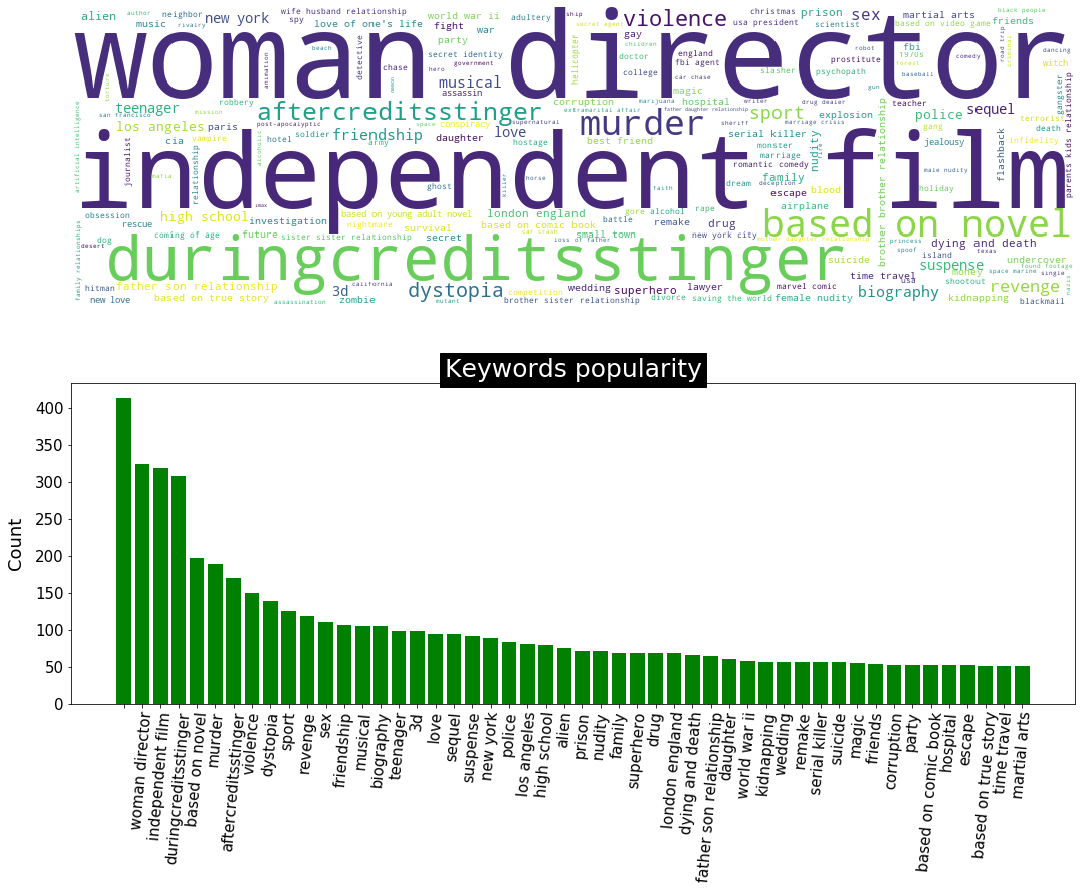

In [30]:
show_wordcloud_hist(movie_df, 'keywords')

The most popular keywords are 'women director', 'independent film', and 'duringcreditsstinger'

### The most produced genres

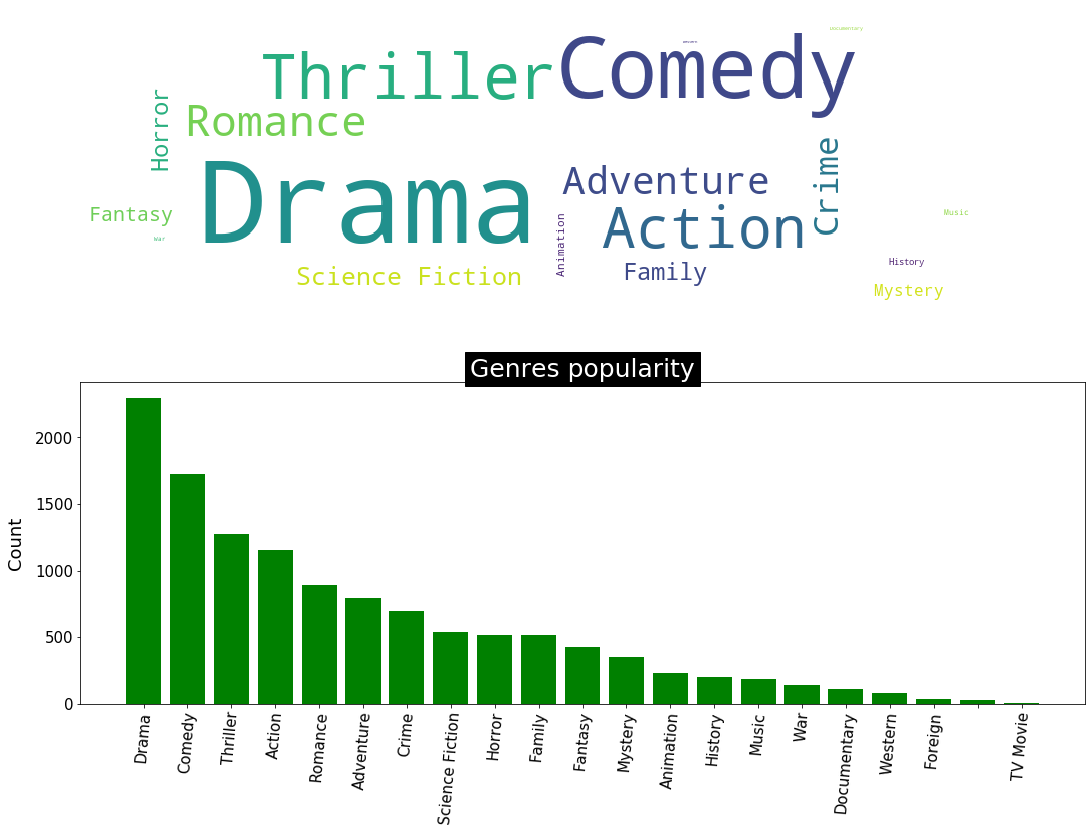

In [31]:
show_wordcloud_hist(movie_df, 'genres')

The most produced genres are 'Drama', 'Comedy', 'Thriller', 'Action', and 'Romance'

### Company that produced the most film

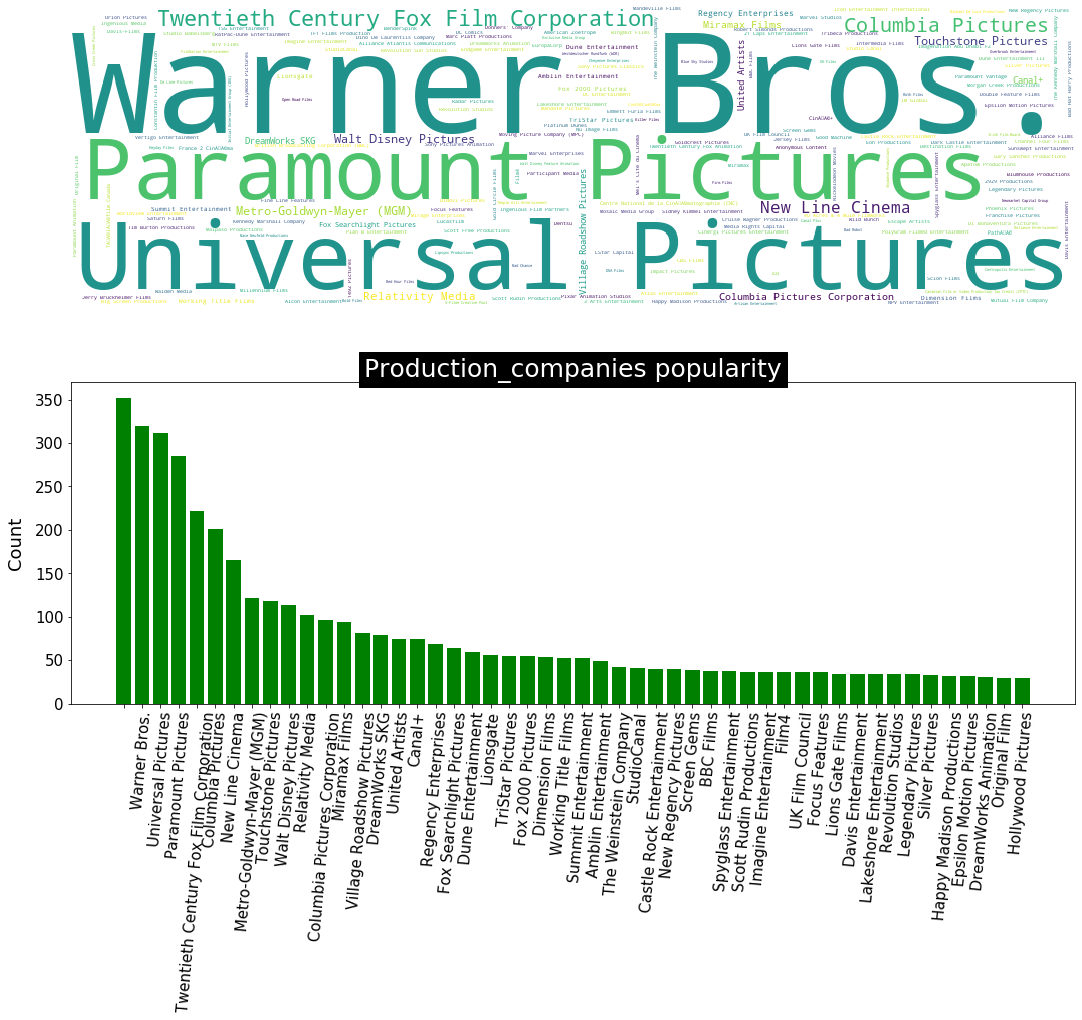

In [32]:
show_wordcloud_hist(movie_df, 'production_companies')

### Total and Max Revenue and Budget by Year

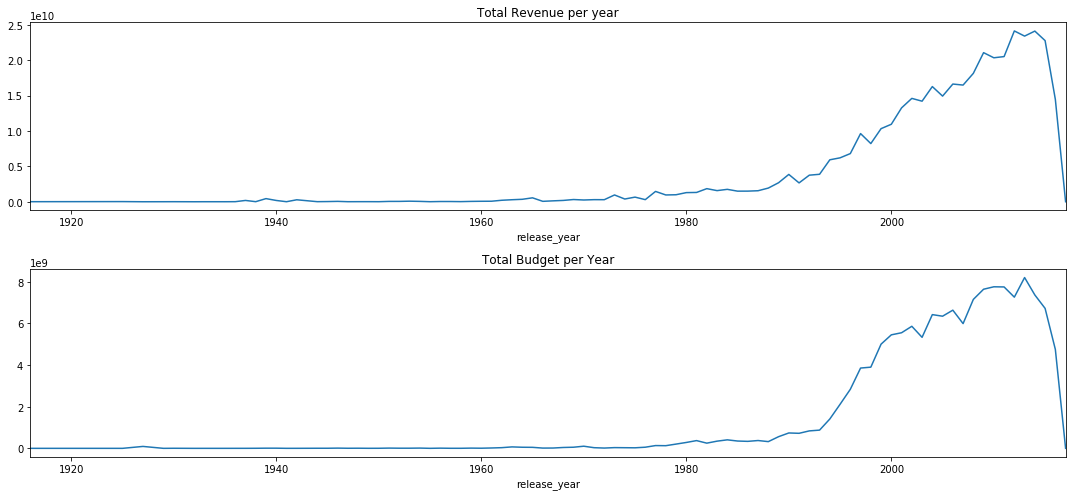

In [33]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
movie_df.groupby('release_year').sum()['revenue'].plot()
ax1.set_title('Total Revenue per year')
ax2 = fig.add_subplot(2,1,2)
movie_df.groupby('release_year').sum()['budget'].plot()
ax2.set_title('Total Budget per Year')
plt.tight_layout()
plt.show()

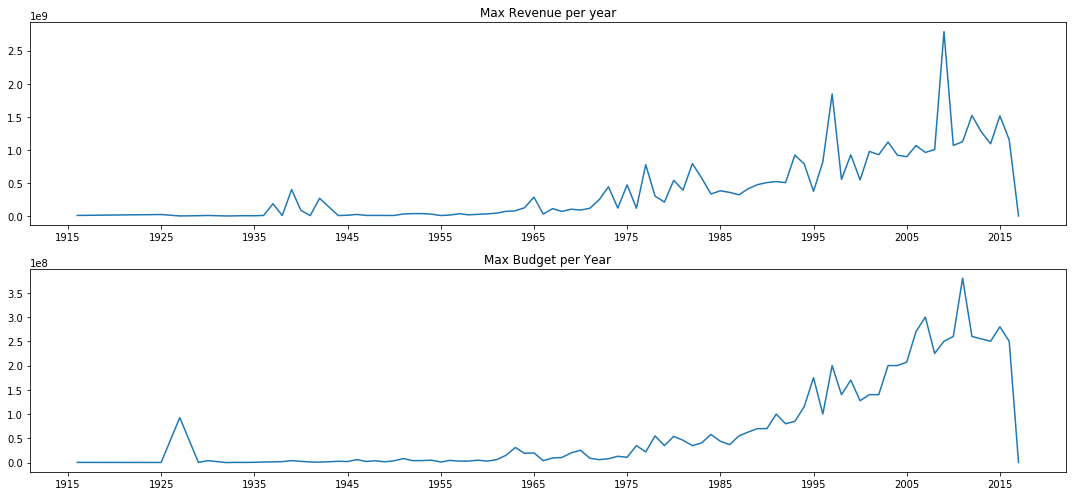

In [34]:
df=movie_df
year_revenue = df.groupby('release_year')['revenue'].max()
year_budget = df.groupby('release_year')['budget'].max()
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(year_revenue.index, year_revenue)
ax1.set_title('Max Revenue per year')
ax1.set_xticks(np.arange(1915, 2016, 10))
ax2 = fig.add_subplot(2,1,2)
ax2.plot(year_budget.index, year_budget)
ax2.set_title('Max Budget per Year')
ax2.set_xticks(np.arange(1915, 2016, 10))
plt.tight_layout()
plt.show()

### Drama, Thriller, Action, Romance, Adventure, Crime, Science Fiction, Horror (plot by year)

In [35]:
# 1950s: growing influence of television
# In the early 1950s, the proliferation of black-and-white television started seriously depressing North American 
# theater attendance.[citation needed] In an attempt to lure audiences back into theaters, bigger screens were installed, 
# widescreen processes, polarized 3D projection, and stereophonic sound were introduced, and more films were made in color, 
# which soon became the rule rather than the exception. Some important mainstream Hollywood films were still being made in 
# black-and-white as late as the mid-1960s, but they marked the end of an era. Color television receivers had been available 
# in the US since the mid-1950s, but at first, they were very expensive and few broadcasts were in color. During the 1960s, 
# prices gradually came down, color broadcasts became common, and sales boomed. The overwhelming public verdict in favor of 
# color was clear. After the final flurry of black-and-white films had been released in mid-decade, all Hollywood studio 
# productions were filmed in color, with the usual exceptions made only at the insistence of "star" filmmakers such as Peter 
# Bogdanovich and Martin Scorsese.[citation needed]

# 1960s and later
# The decades following the decline of the studio system in the 1960s saw changes in the production and style of film. 
# Various New Wave movements (including the French New Wave, Indian New Wave, Japanese New Wave, and New Hollywood) and 
# the rise of film-school-educated independent filmmakers contributed to the changes the medium experienced in the latter 
# half of the 20th century.[citation needed] Digital technology has been the driving force for change throughout the 1990s 
# and into the 2000s. Digital 3D projection largely replaced earlier problem-prone 3D film systems and has become popular 
# in the early 2010s.[citation needed]

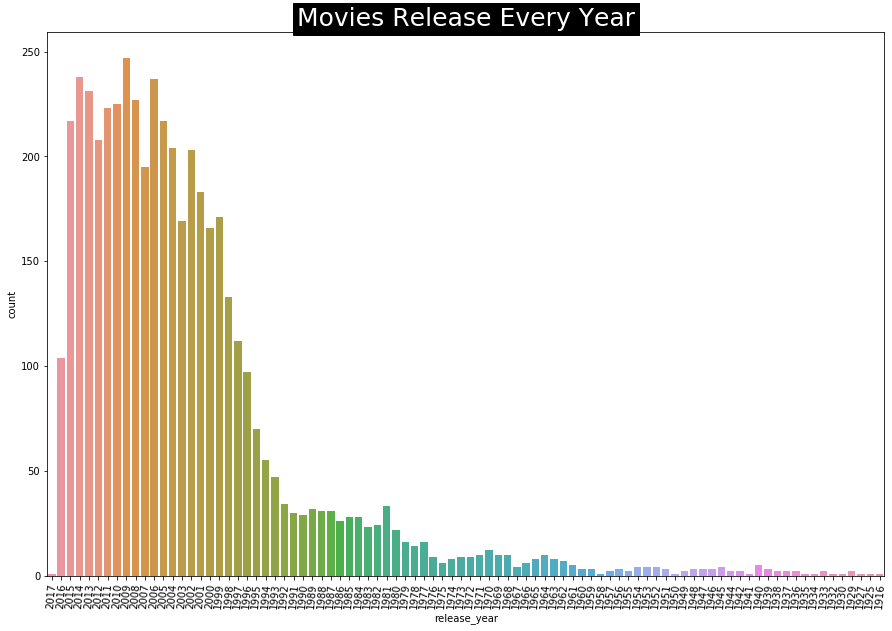

In [36]:
#plot all genres film by year
list_x = sorted(movie_df['release_year'].unique(), reverse=True)
plt.figure(figsize=(15,10))
plt.xticks(rotation=85, fontsize = 10)
plt.title(f"Movies Release Every Year",bbox={'facecolor':'k'},color='w',fontsize = 25)
sns.countplot(movie_df['release_year'], order = list_x)

The numbers of film that release since 1990 had been increase exponentially.

In [37]:
#function for ploting only one class from a column
def show_plot_by_year(df,col,slicer):
    if slicer != None:
        slice_df = df[df[col].str.contains(slicer)]
    else:
        slice_df = df
        slicer = 'All'
        
    list_x = sorted(df['release_year'].unique(), reverse=True)
    plt.figure(figsize=(15,10))
    plt.xticks(rotation=85, fontsize = 10)
    plt.title(f"{slicer.capitalize()} {col.capitalize()} Year after Year",bbox={'facecolor':'k'},color='w',fontsize = 25)
    sns.countplot(slice_df['release_year'], order = list_x)
    plt.show()

#function for ploting only one class from a column
def show_plot_by_month(df,col,slicer):
    if slicer != None:
        slice_df = df[df[col].str.contains(slicer)]
    else:
        slice_df = df
        slicer = 'All'
        
    list_x = sorted(df['release_month'].unique())
    plt.figure(figsize=(15,10))
    plt.xticks(fontsize = 10)
    plt.title(f"{slicer.capitalize()} {col.capitalize()} per Month",bbox={'facecolor':'k'},color='w',fontsize = 25)
    sns.countplot(slice_df['release_month'], order = list_x)
    plt.show()

In [38]:
#make a copy and fillna
movie_copy = movie_df.fillna('')

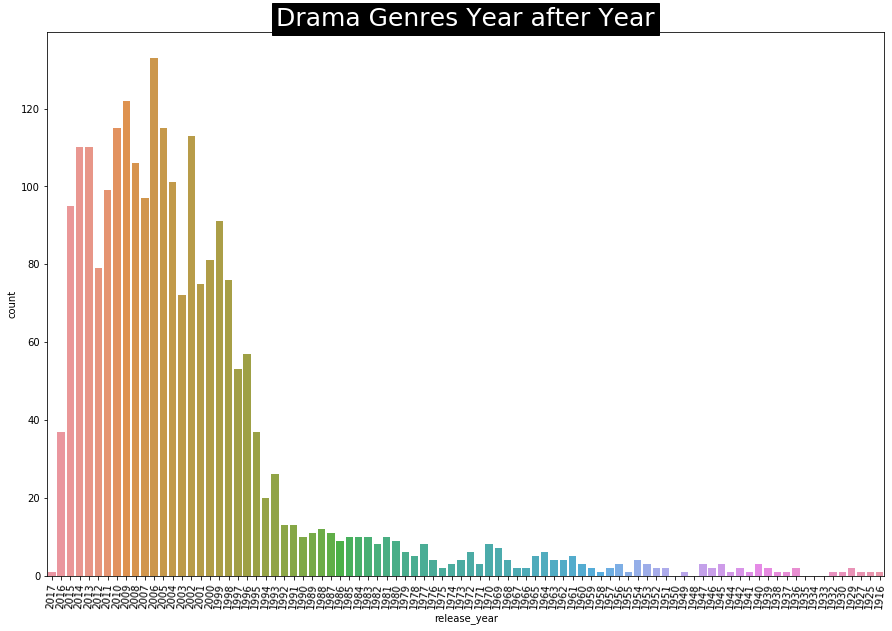

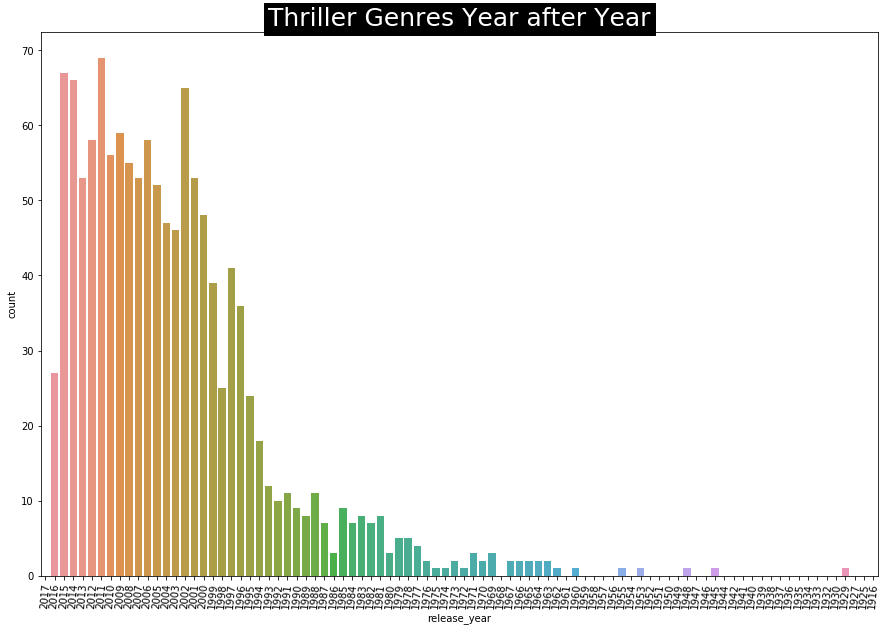

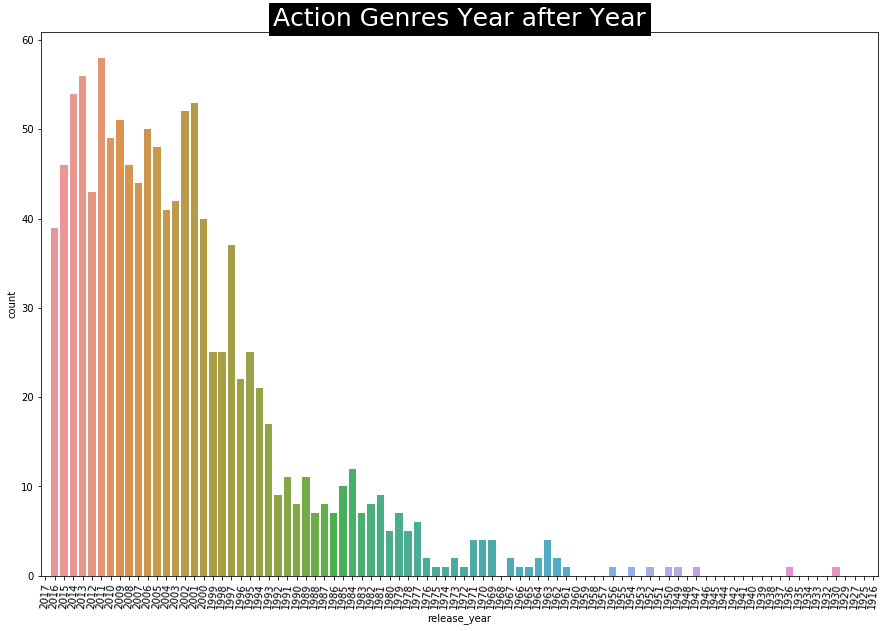

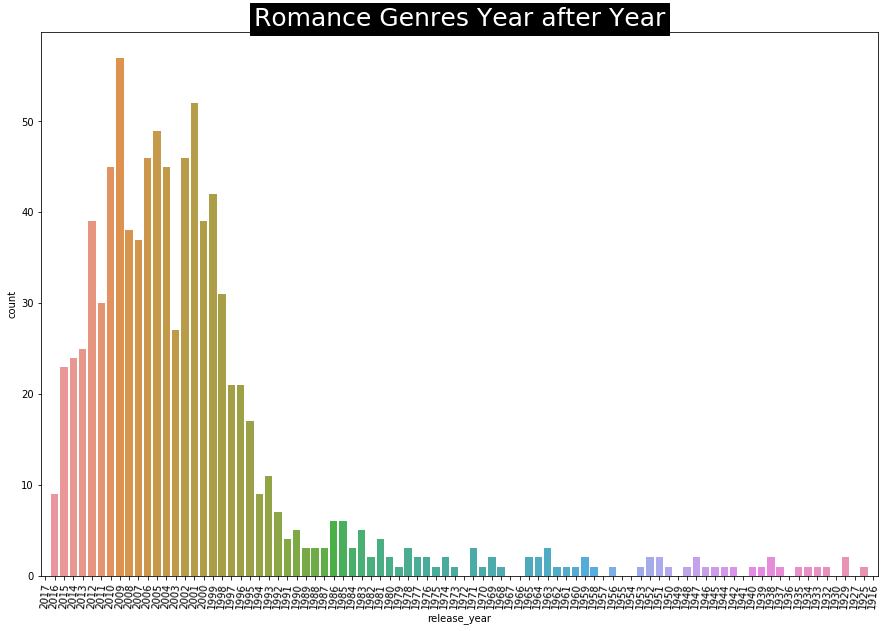

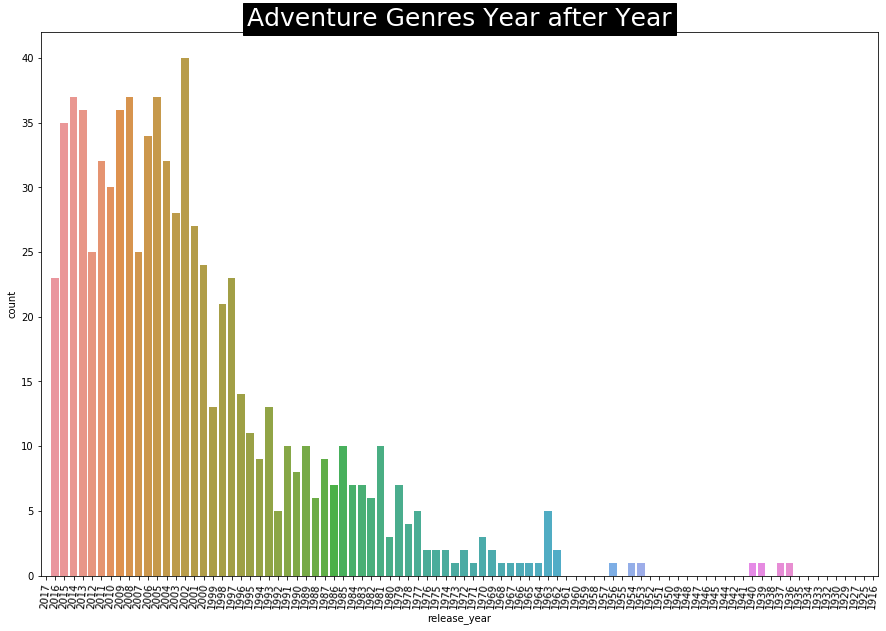

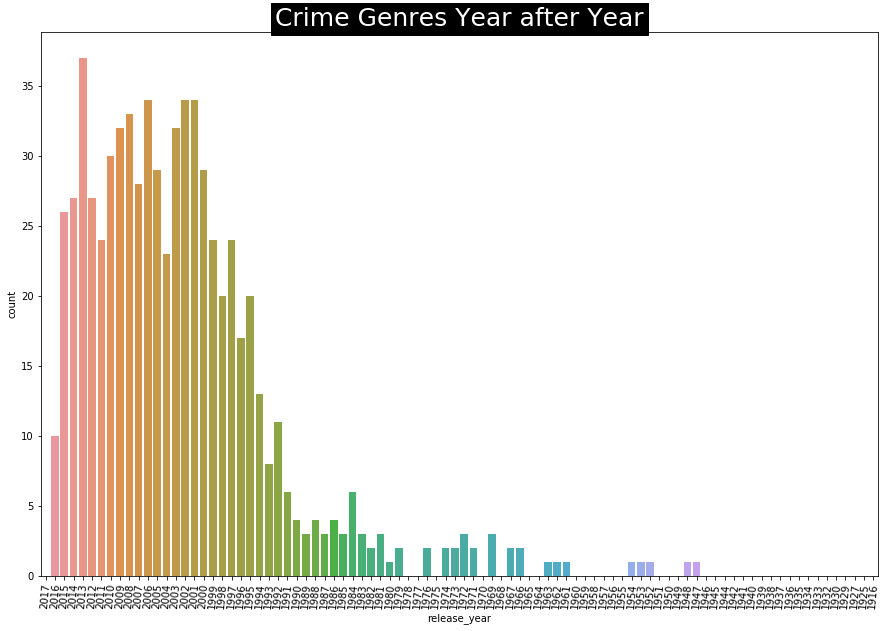

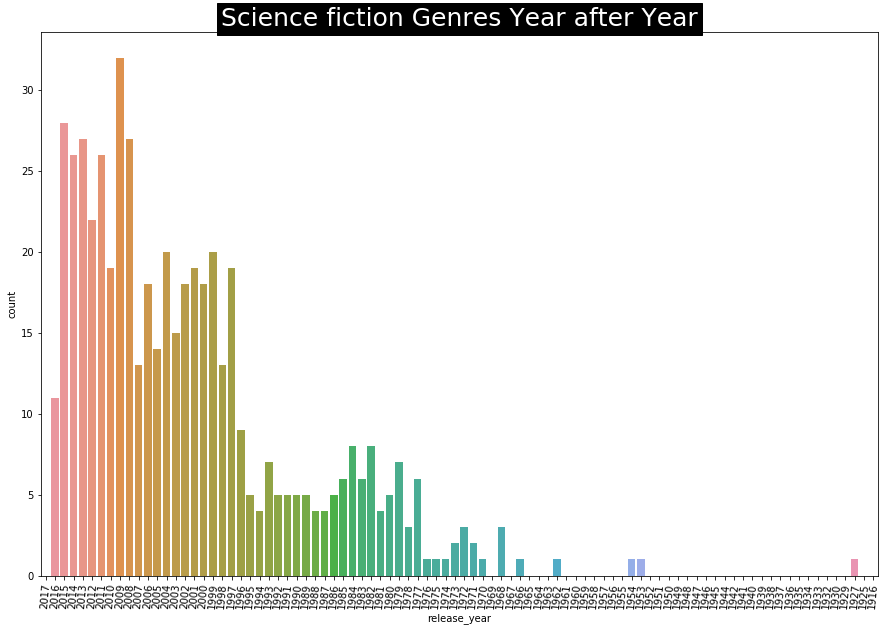

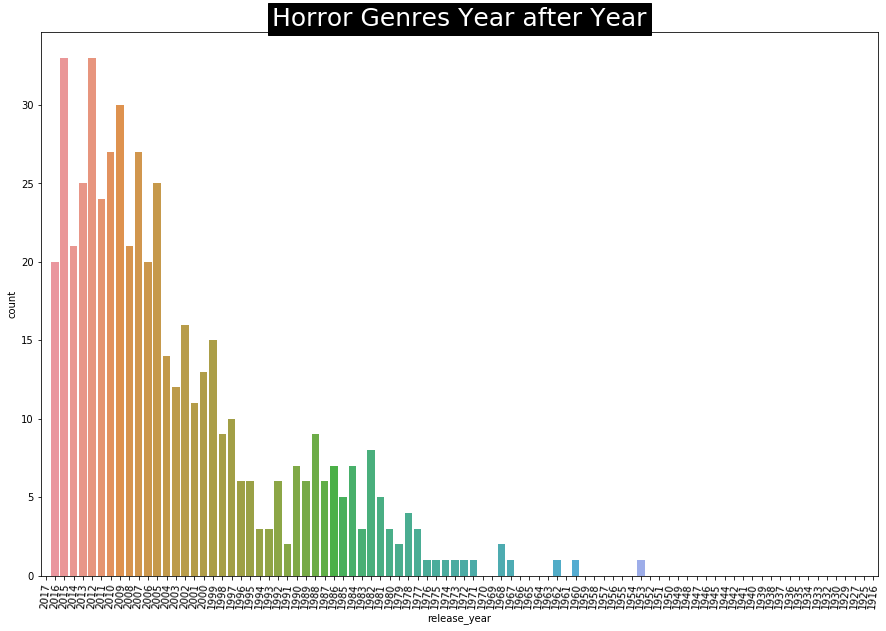

In [39]:
#plot 8 top genres by year
for i in ['Drama', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Science Fiction', 'Horror']:
    show_plot_by_year(movie_copy,'genres' ,i)

### Drama, Thriller, Action, Romance, Adventure, Crime, Science Fiction, Horror (plot by month)

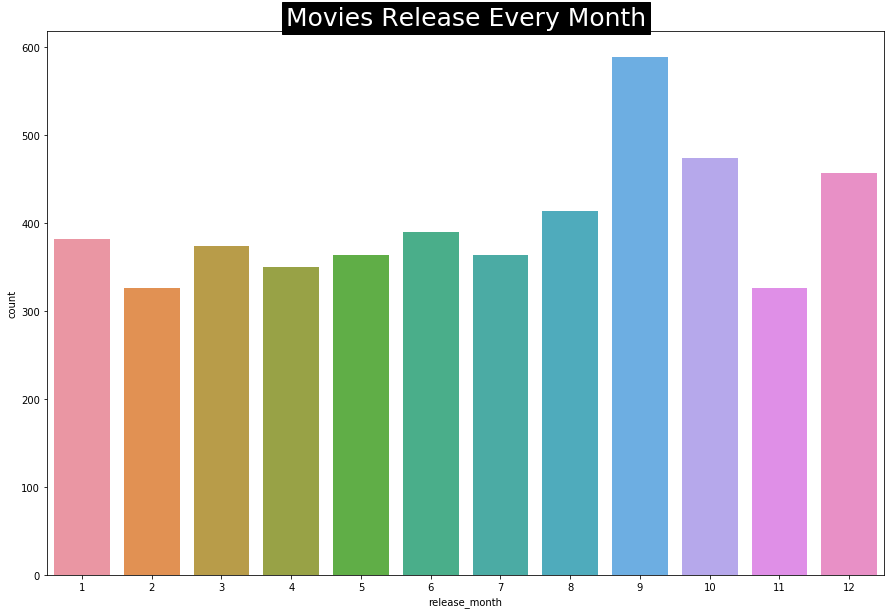

In [40]:
list_x = sorted(movie_df['release_month'].unique())
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 10)
plt.title(f"Movies Release Every Month",bbox={'facecolor':'k'},color='w',fontsize = 25)
sns.countplot(movie_df['release_month'], order = list_x)

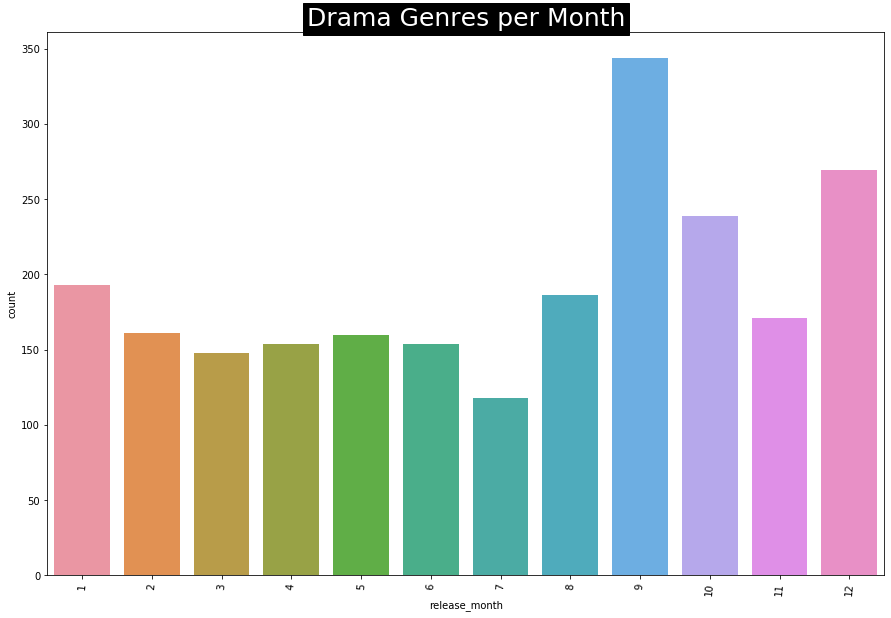

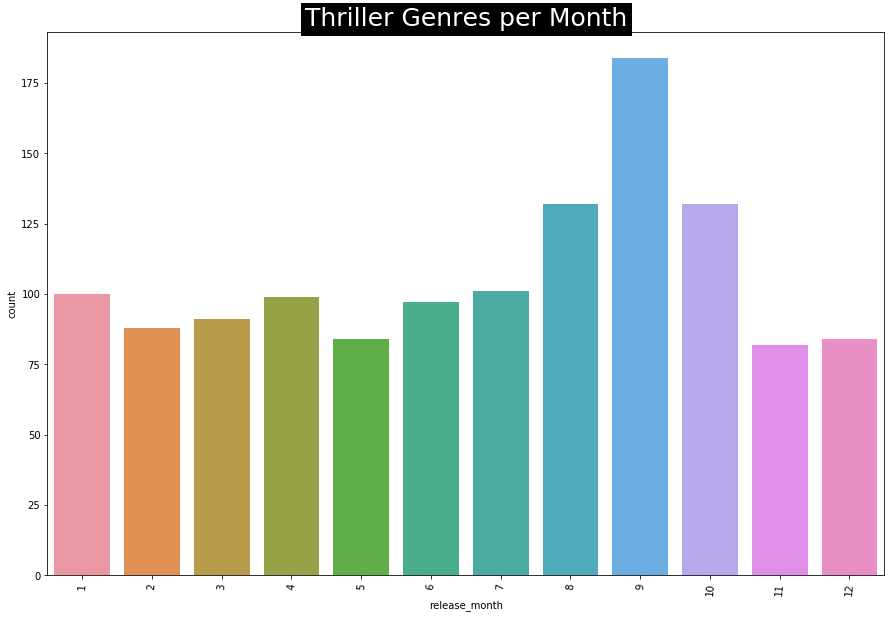

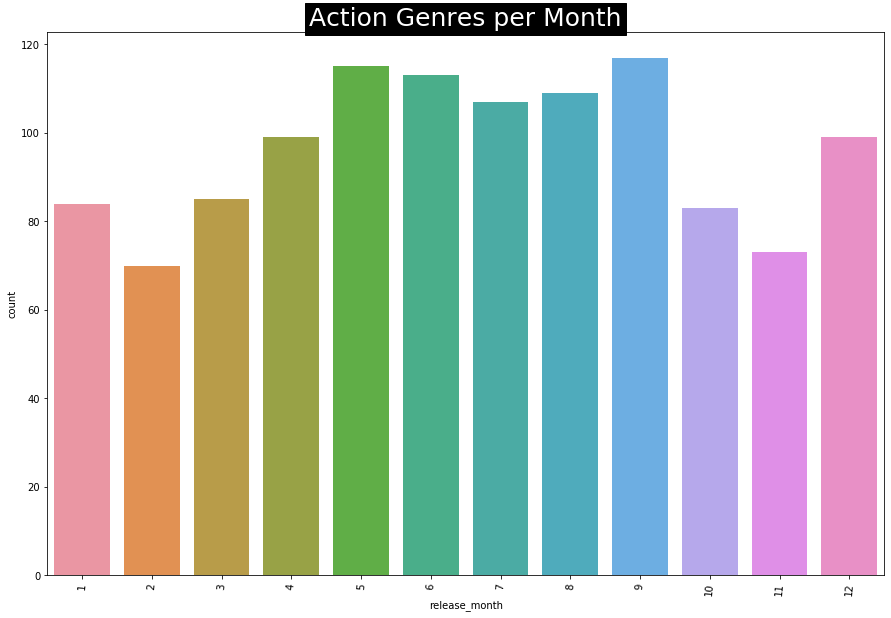

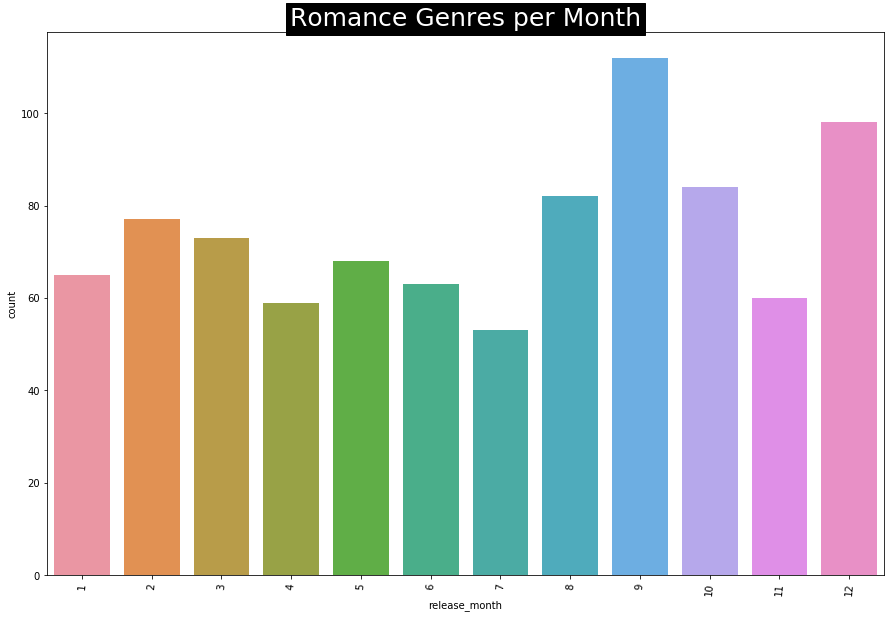

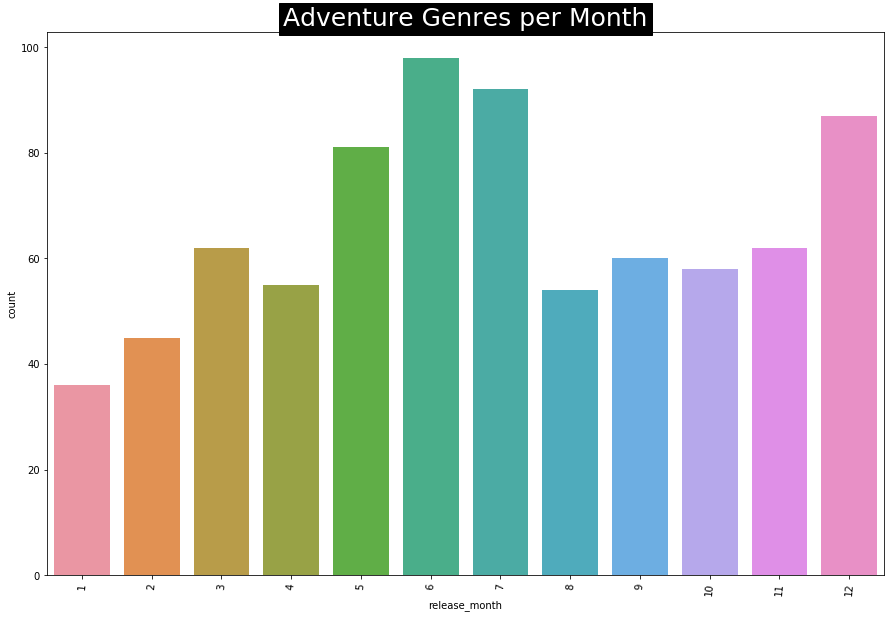

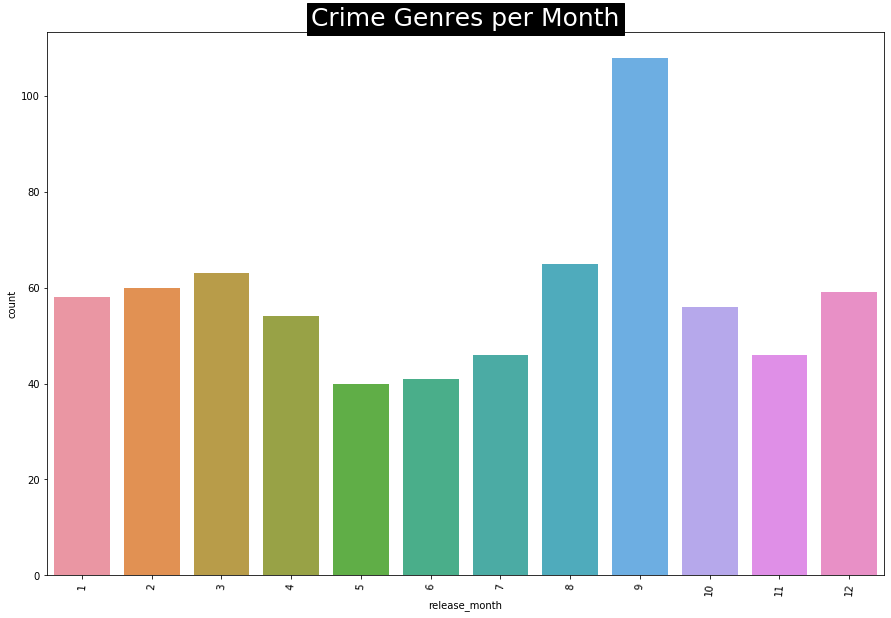

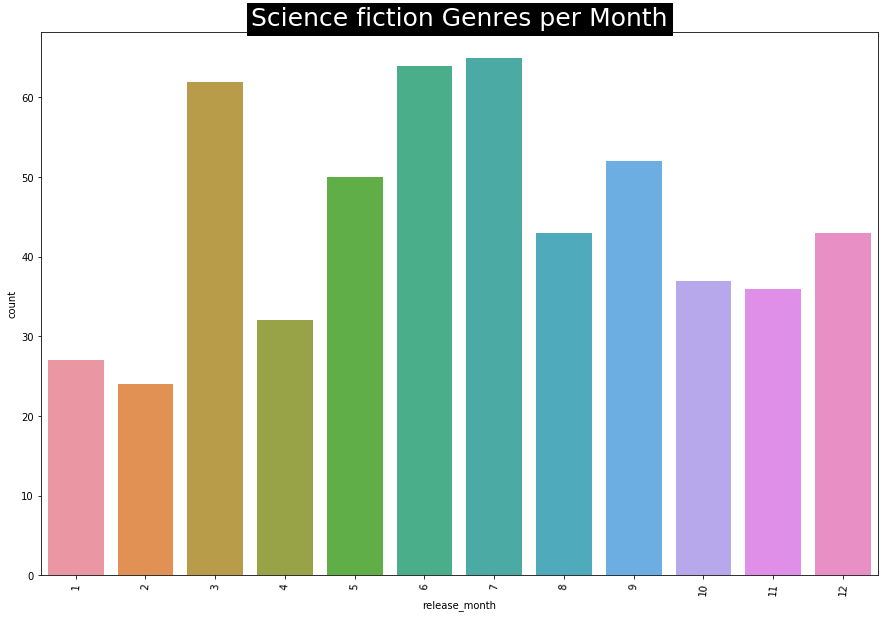

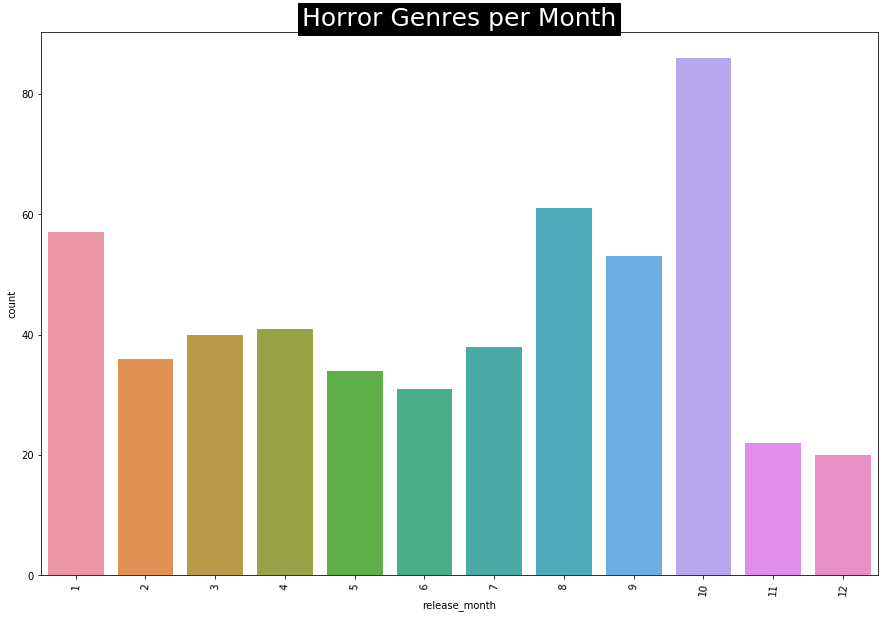

In [41]:
for i in ['Drama', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Science Fiction', 'Horror']:
    show_plot_by_month(movie_copy,'genres' ,i)

Most films release at september, this might be happened because a lot of drama movie release at that time, since drama is the most release genre. If we break down to every genre, we can see that not every film is release at september. Horror movies for example, were release more at October.

### Top 30 movies that used the highest budget, generated the most revenue, get the highest popularity and vote_count

In [42]:
n=30
movie_df.loc[movie_df['revenue'].sort_values(ascending = False).head(n).index][['genres','title','revenue','budget','director']]

genres  \
0    Action,Adventure,Fantasy,Science Fiction    
25   Drama,Romance,Thriller                      
16   Science Fiction,Action,Adventure            
28   Action,Adventure,Science Fiction,Thriller   
44   Action                                      
7    Action,Adventure,Science Fiction            
124  Animation,Adventure,Family                  
31   Action,Adventure,Science Fiction            
546  Family,Animation,Adventure,Comedy           
26   Adventure,Action,Science Fiction            
52   Action,Science Fiction,Adventure            
329  Adventure,Fantasy,Action                    
29   Action,Adventure,Thriller                   
36   Science Fiction,Action,Adventure            
3    Action,Crime,Drama,Thriller                 
42   Animation,Family,Comedy                     
12   Adventure,Fantasy,Action                    
17   Adventure,Action,Fantasy                    
32   Family,Fantasy,Adventure                    
98   Adventure,Fantasy,Action                    
65   Drama,Action,Crime,Thriller                 
197  Adventure,Fantasy,Family                    
506  Animation,Comedy,Family                     
78   Family,Adventure,Drama,Fantasy              
1    Adventure,Fantasy,Action                    
22   Adventure,Fantasy                           
19   Action,Adventure,Fantasy                    
328  Animation,Family                            
113  Adventure,Fantasy,Family,Mystery            
8    Adventure,Fantasy,Family                    

                                             title     revenue     budget  \
0    Avatar                                         2787965087  237000000   
25   Titanic                                        1845034188  200000000   
16   The Avengers                                   1519557910  220000000   
28   Jurassic World                                 1513528810  150000000   
44   Furious 7                                      1506249360  190000000   
7    Avengers: Age of Ultron                        1405403694  280000000   
124  Frozen                                         1274219009  150000000   
31   Iron Man 3                                     1215439994  200000000   
546  Minions                                        1156730962  74000000    
26   Captain America: Civil War                     1153304495  250000000   
52   Transformers: Dark of the Moon                 1123746996  195000000   
329  The Lord of the Rings: The Return of the King  1118888979  94000000    
29   Skyfall                                        1108561013  200000000   
36   Transformers: Age of Extinction                1091405097  210000000   
3    The Dark Knight Rises                          1084939099  250000000   
42   Toy Story 3                                    1066969703  200000000   
12   Pirates of the Caribbean: Dead Man's Chest     1065659812  200000000   
17   Pirates of the Caribbean: On Stranger Tides    1045713802  380000000   
32   Alice in Wonderland                            1025491110  200000000   
98   The Hobbit: An Unexpected Journey              1021103568  250000000   
65   The Dark Knight                                1004558444  185000000   
197  Harry Potter and the Philosopher's Stone       976475550   125000000   
506  Despicable Me 2                                970761885   76000000    
78   The Jungle Book                                966550600   175000000   
1    Pirates of the Caribbean: At World's End       961000000   300000000   
22   The Hobbit: The Desolation of Smaug            958400000   250000000   
19   The Hobbit: The Battle of the Five Armies      956019788   250000000   
328  Finding Nemo                                   940335536   94000000    
113  Harry Potter and the Order of the Phoenix      938212738   150000000   
8    Harry Potter and the Half-Blood Prince         933959197   250000000   

                       director  
0    James Cameron               
25   James Cameron               

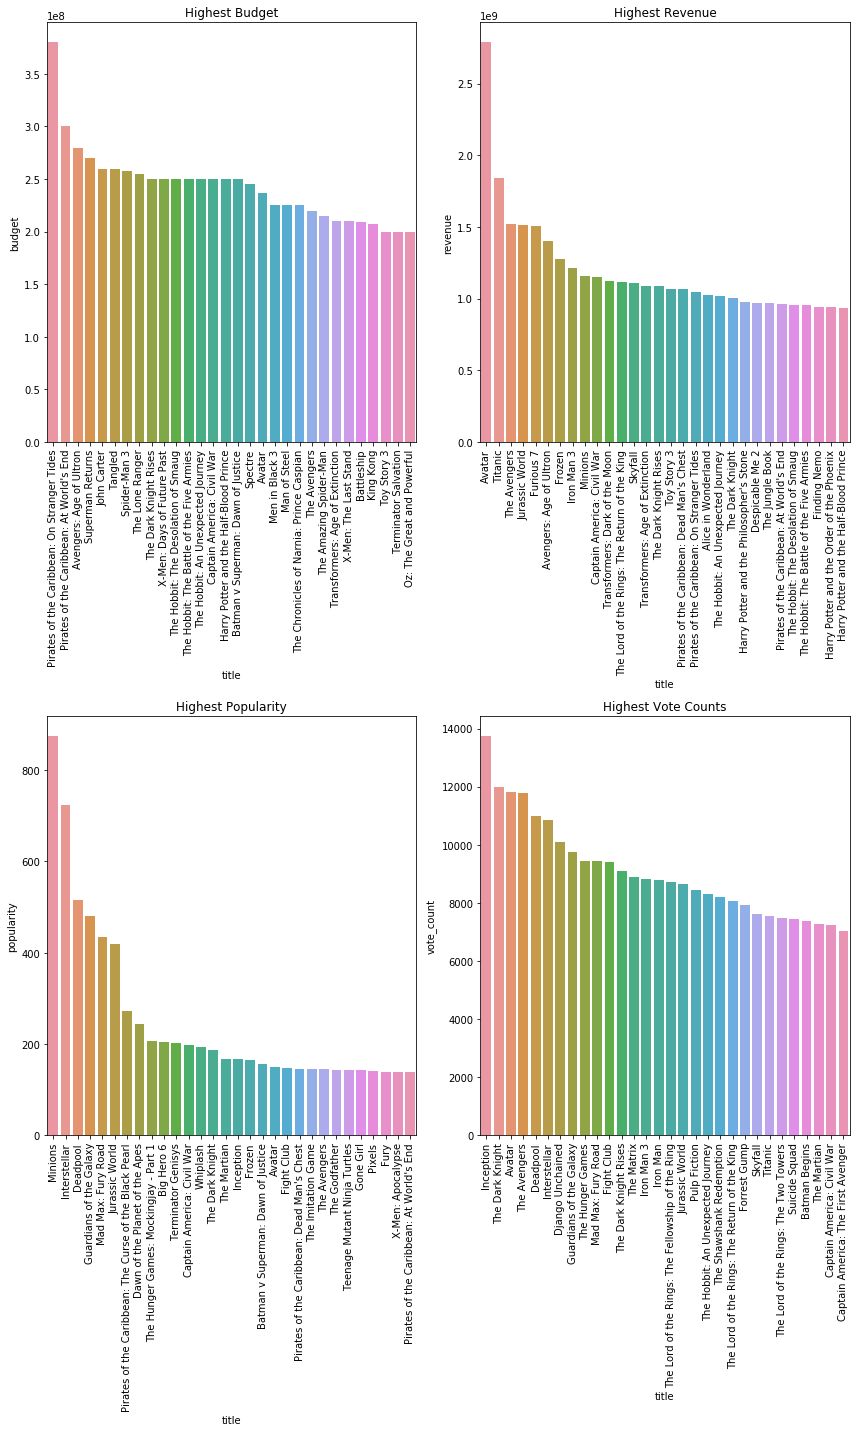

In [43]:
n=30
plt.figure(figsize=(12,20))
plt.subplot(2,2,1)
plt.xticks(rotation=90)
plt.title('Highest Budget')
sns.barplot(data = movie_df.loc[movie_df['budget'].sort_values(ascending = False).head(n).index], x='title', y='budget')
plt.subplot(2,2,2)
plt.xticks(rotation=90)
plt.title('Highest Revenue')
sns.barplot(data = movie_df.loc[movie_df['revenue'].sort_values(ascending = False).head(n).index], x='title', y='revenue')
plt.subplot(2,2,3)
plt.xticks(rotation=90)
plt.title('Highest Popularity')
sns.barplot(data = movie_df.loc[movie_df['popularity'].sort_values(ascending = False).head(n).index], x='title', y='popularity')
plt.tight_layout()
plt.subplot(2,2,4)
plt.xticks(rotation=90)
plt.title('Highest Vote Counts')
sns.barplot(data = movie_df.loc[movie_df['vote_count'].sort_values(ascending = False).head(n).index], x='title', y='vote_count')
plt.tight_layout()

### Number of film produced by top 14 companies that produced the most film by year

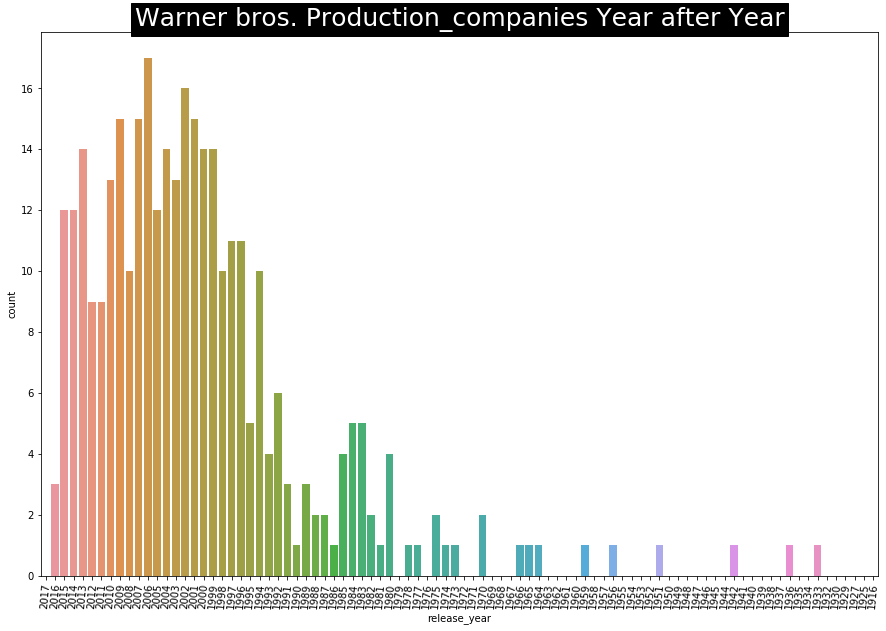

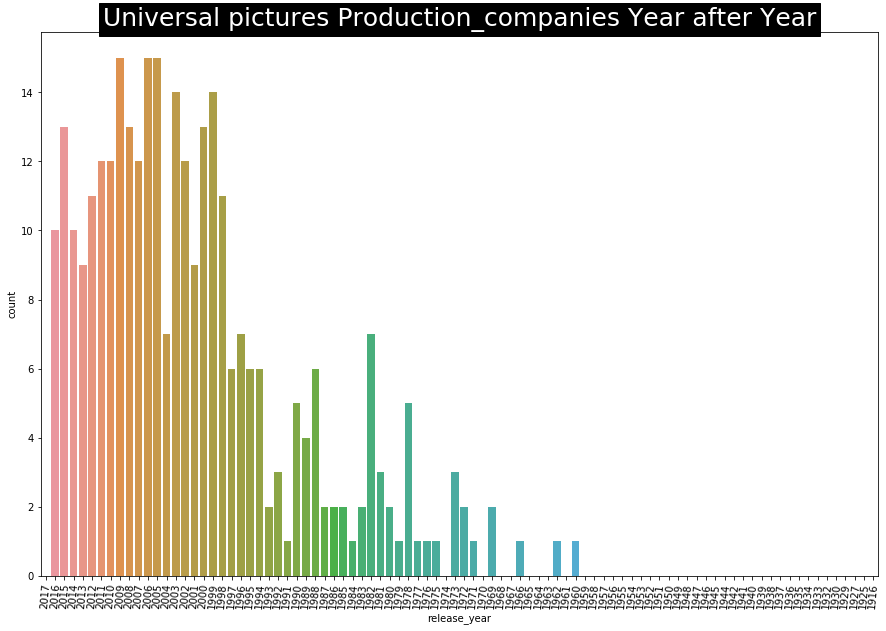

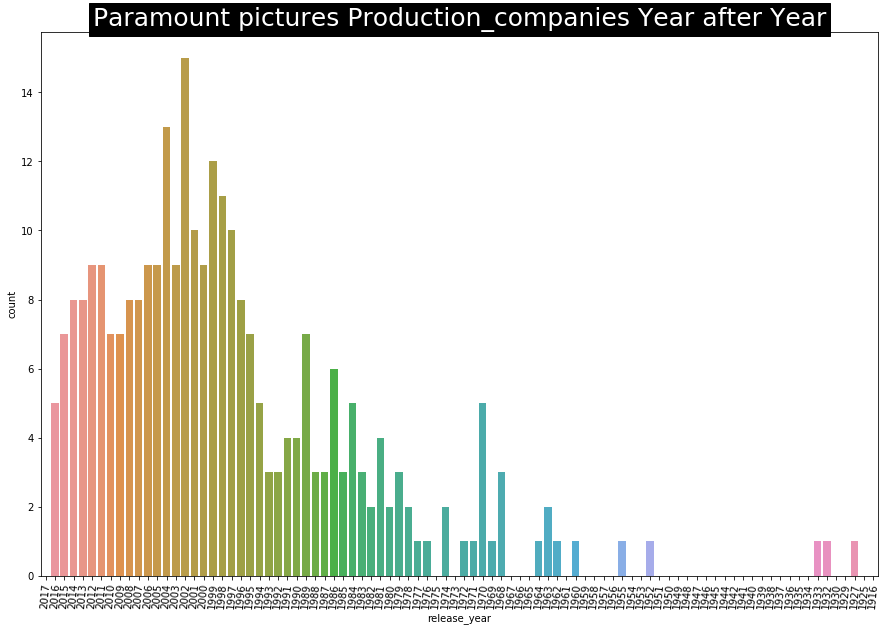

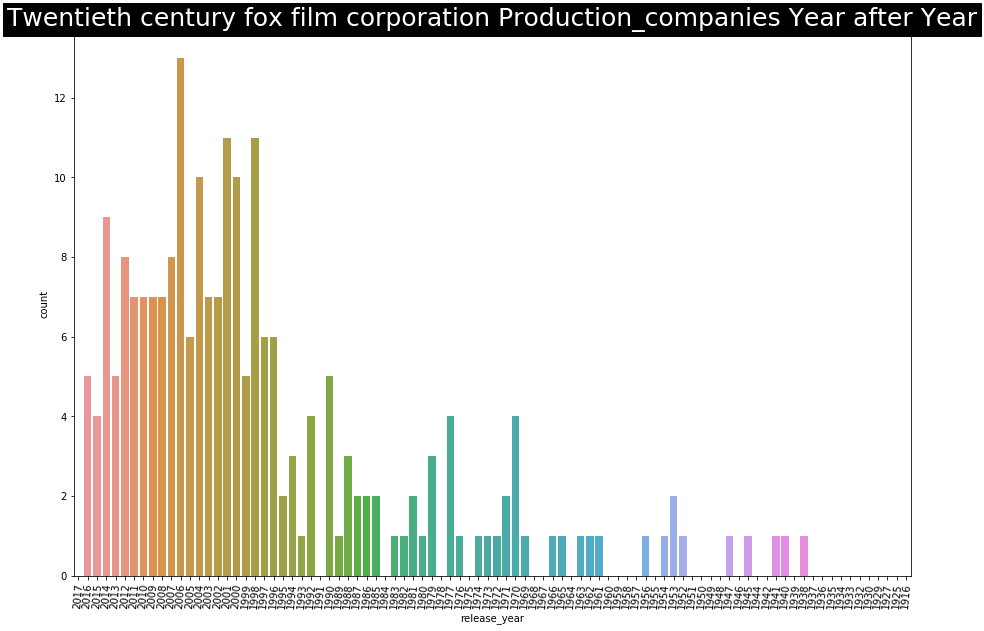

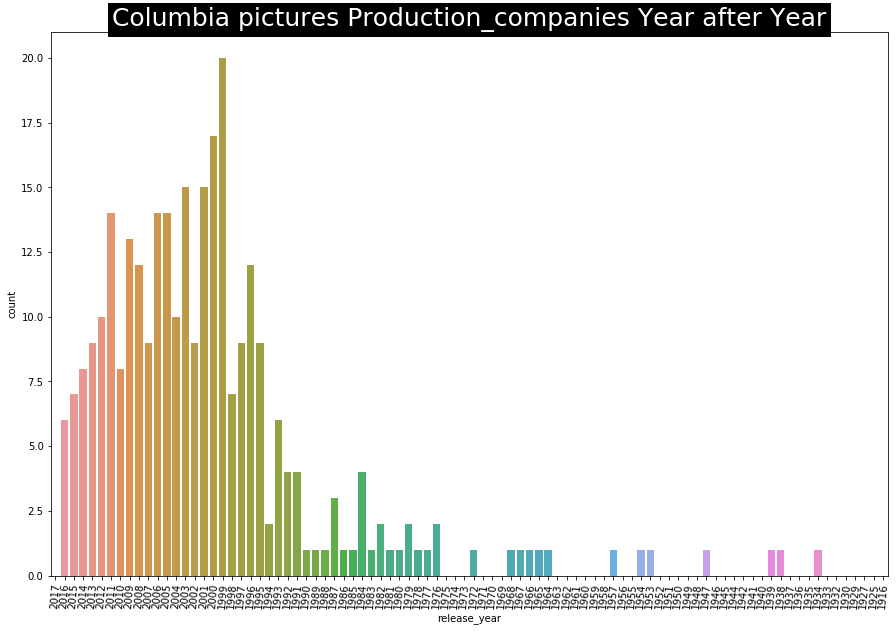

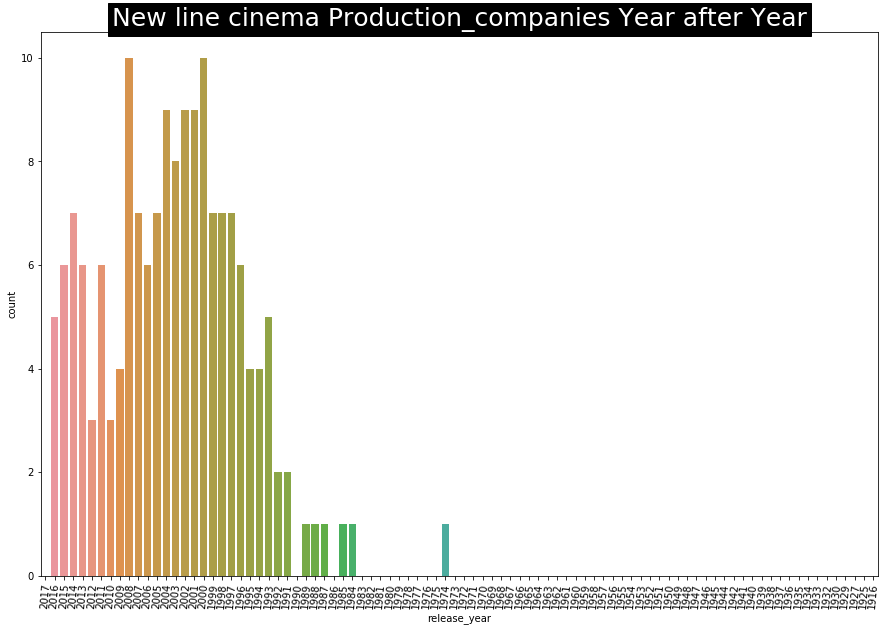

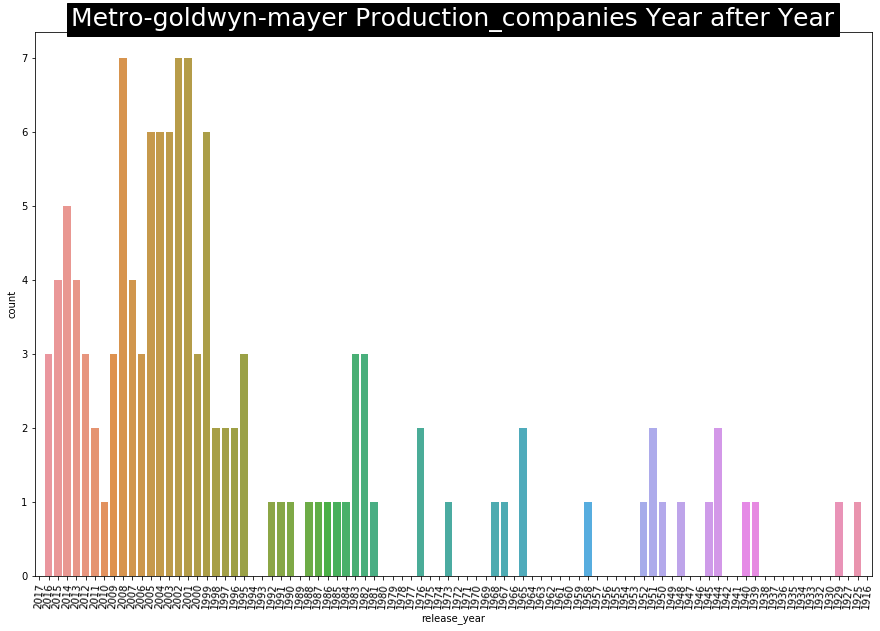

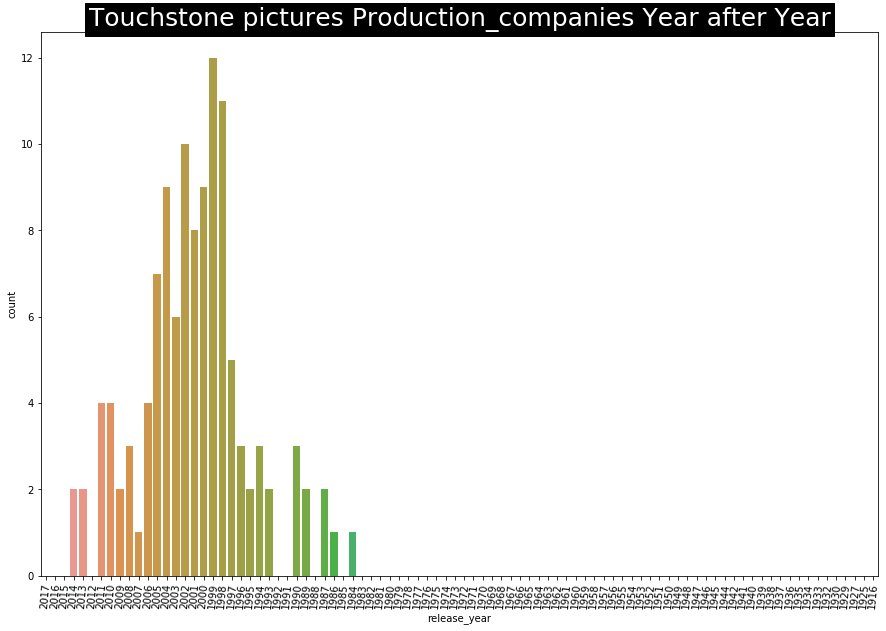

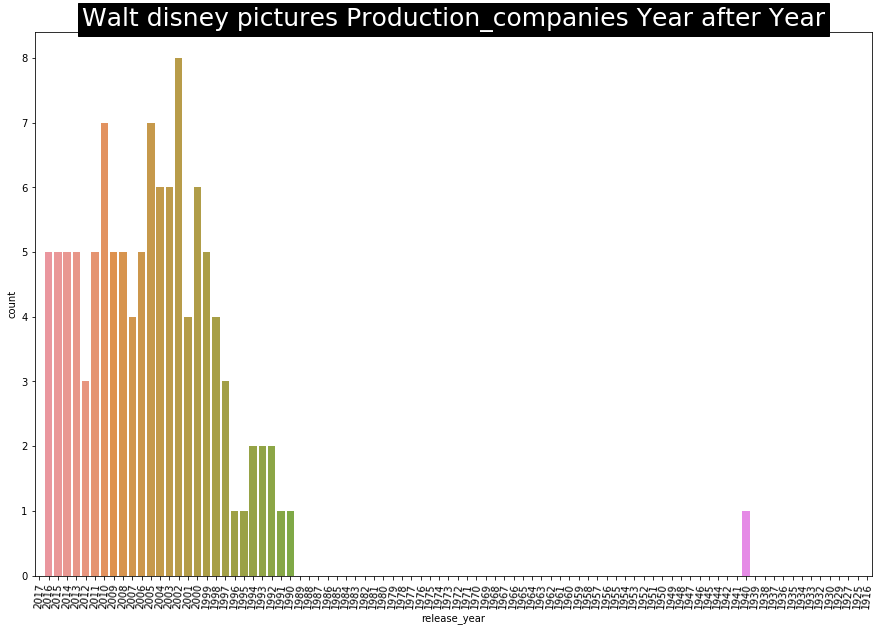

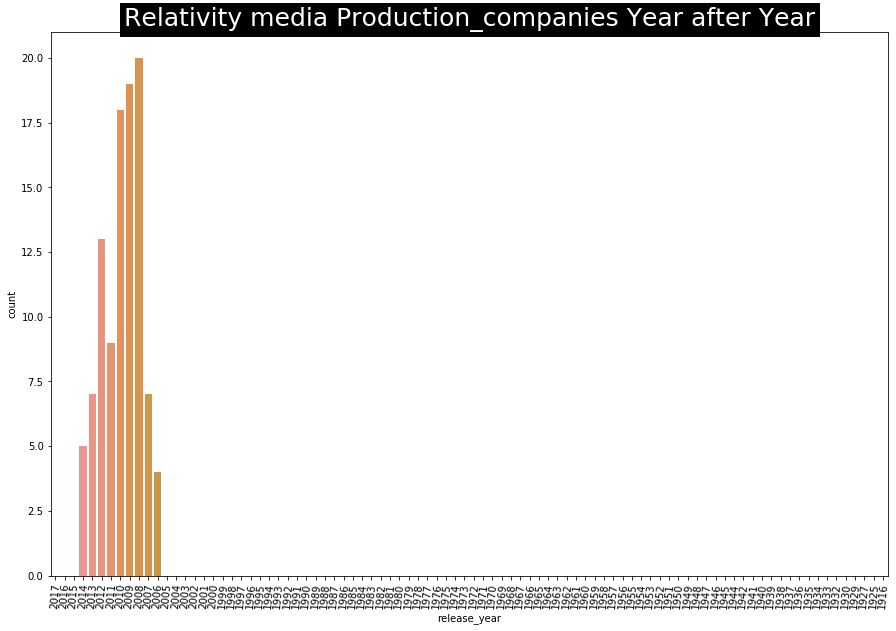

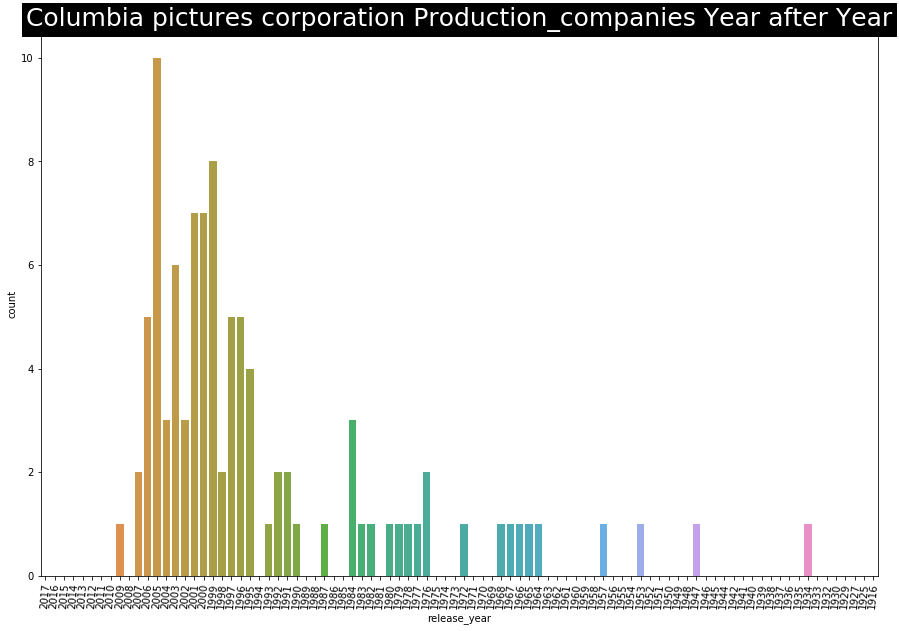

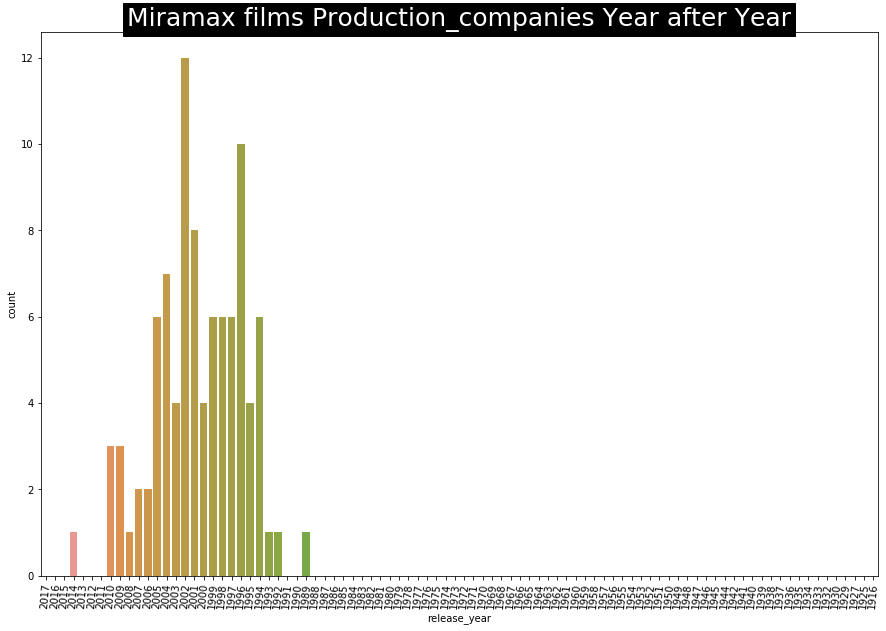

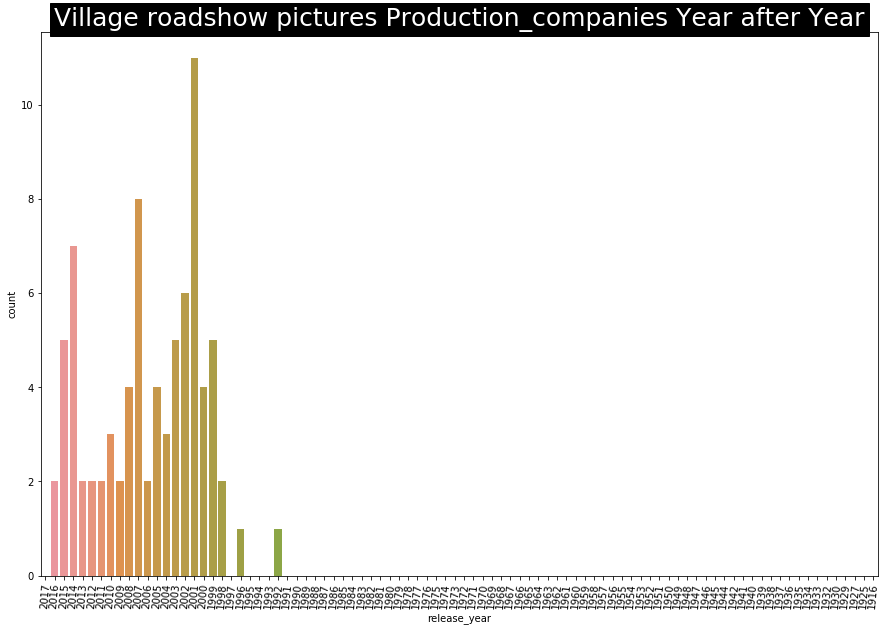

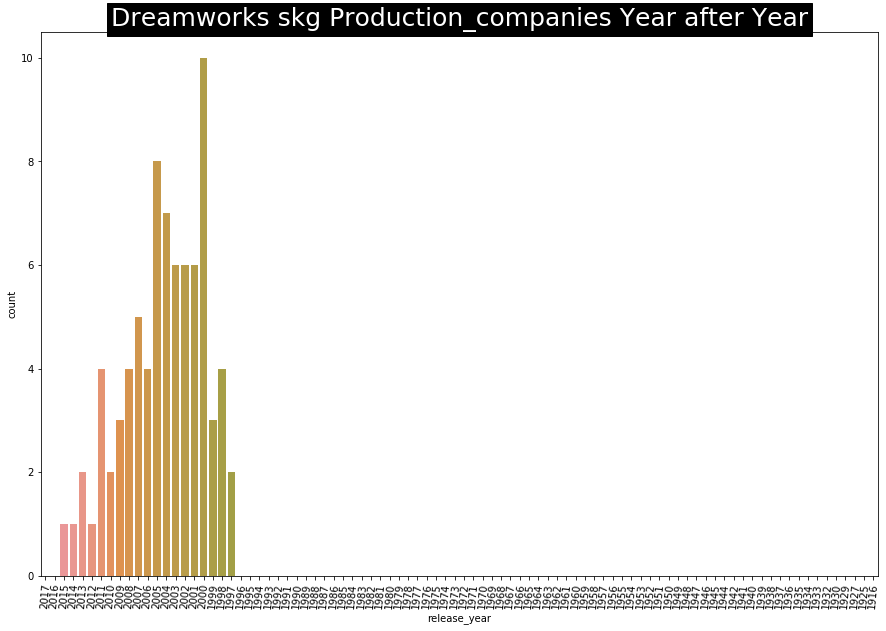

In [44]:
for i in ['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 
          'New Line Cinema', 'Metro-Goldwyn-Mayer', 'Touchstone Pictures', 'Walt Disney Pictures', 'Relativity Media', 
          'Columbia Pictures Corporation', 'Miramax Films', 'Village Roadshow Pictures', 'DreamWorks SKG']:
    show_plot_by_year(movie_copy,'production_companies' ,i)

### Genres produced by top 14 companies that produced the most film

In [45]:
#wordcloud and histogram groupby slicer
def show_plot_groupby(df,col,gb_col,slicer):
    slice_df = df[df[gb_col].str.contains(slicer)]
    title = f'{col.capitalize()} produced by {slicer}'
    show_wordcloud_hist(slice_df, col, title)

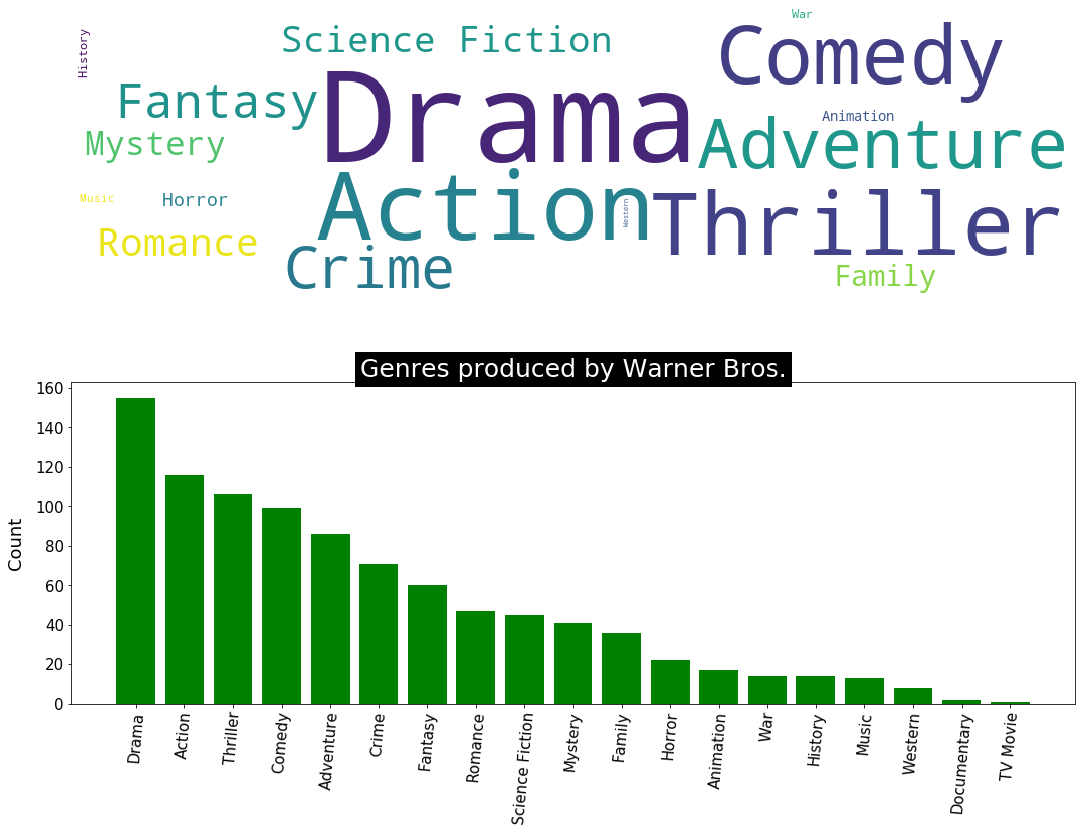

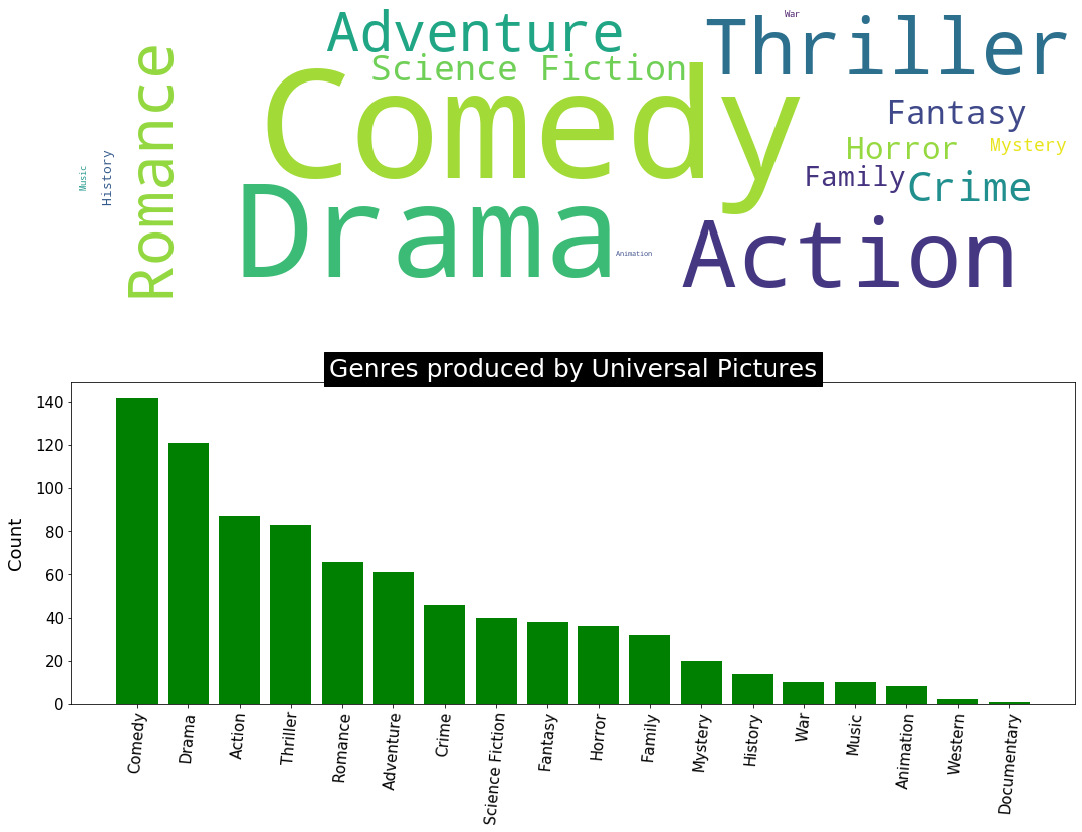

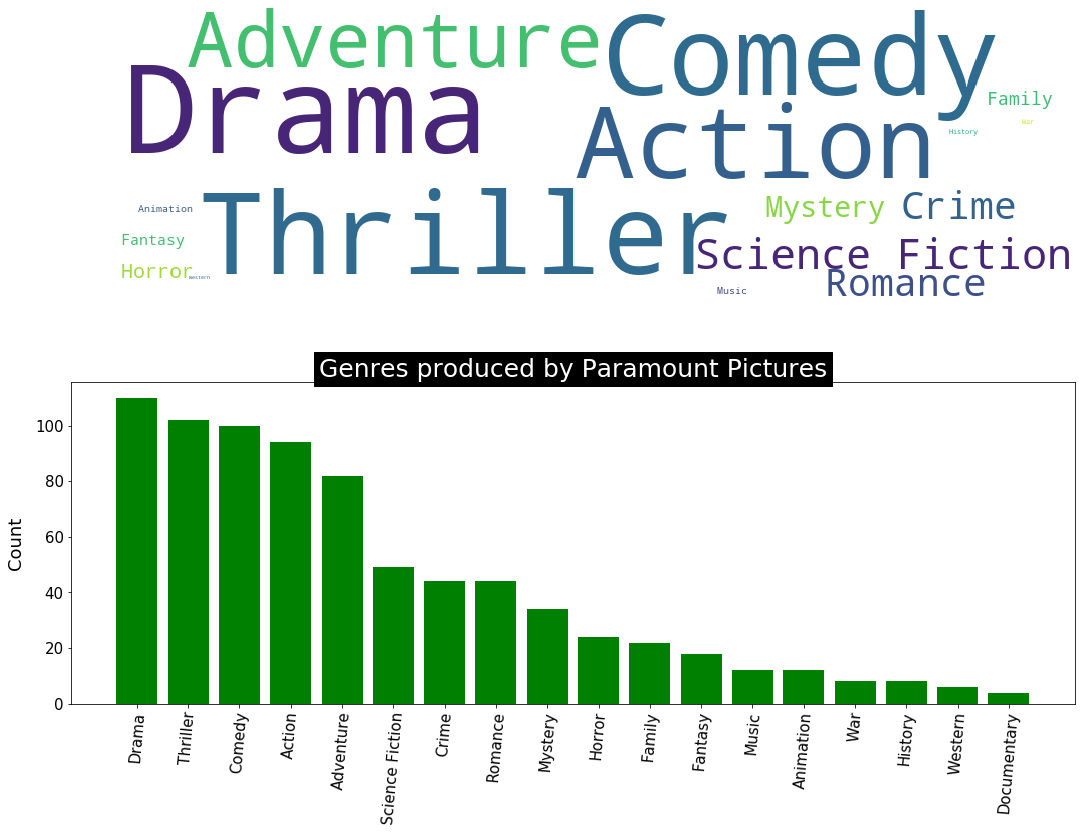

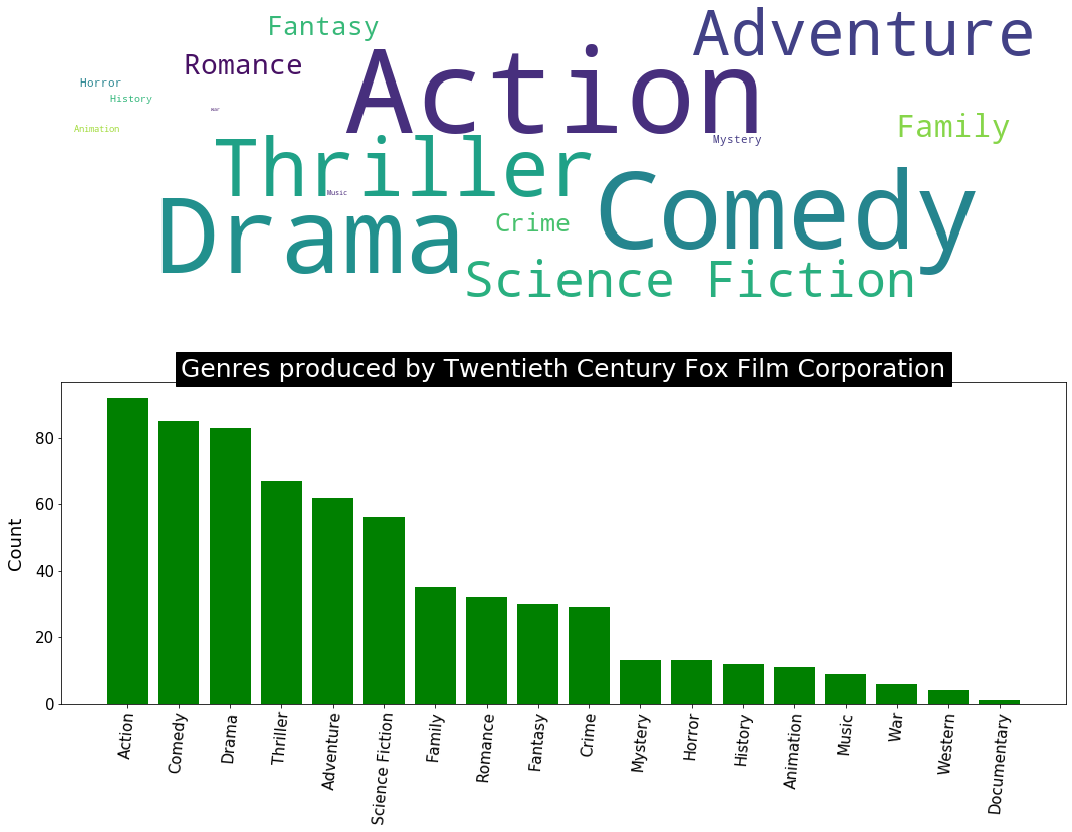

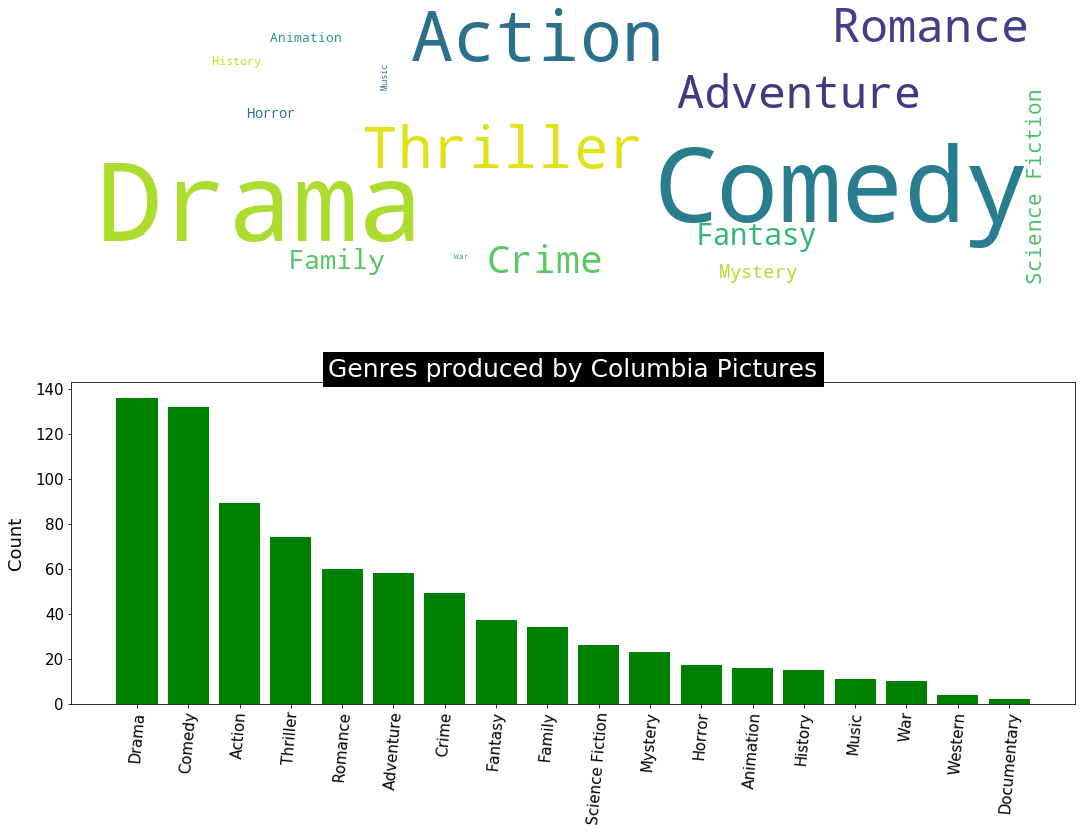

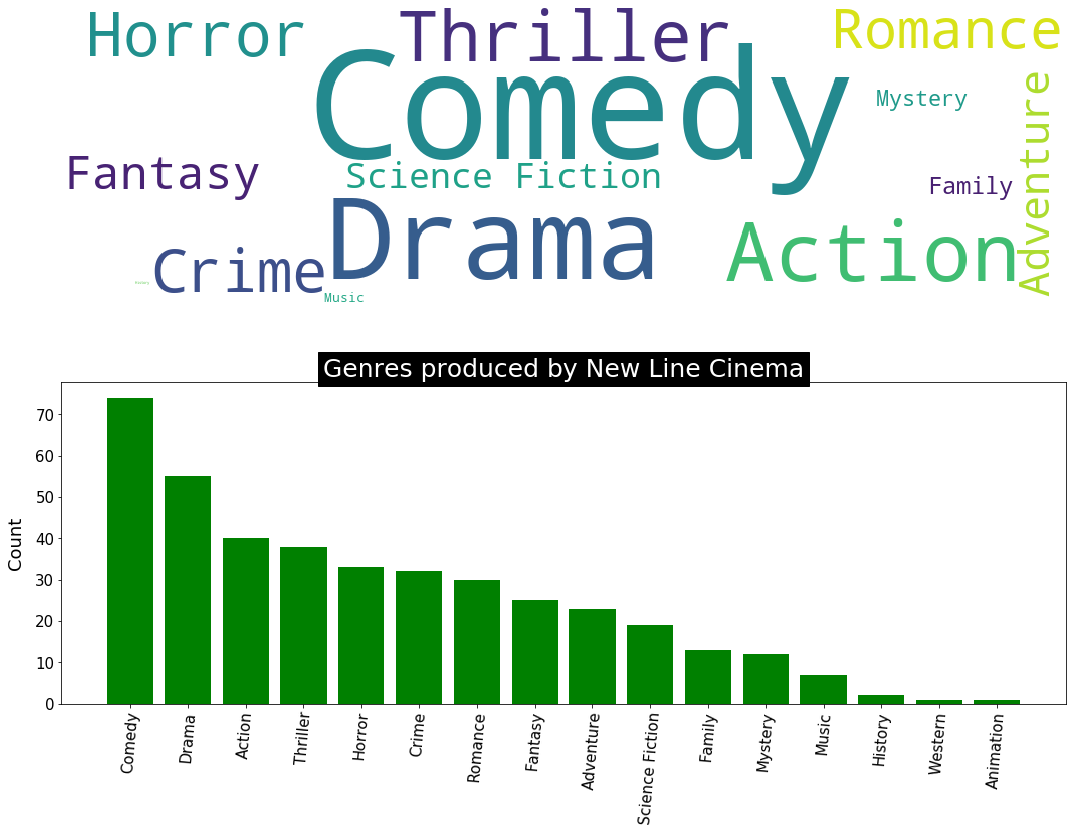

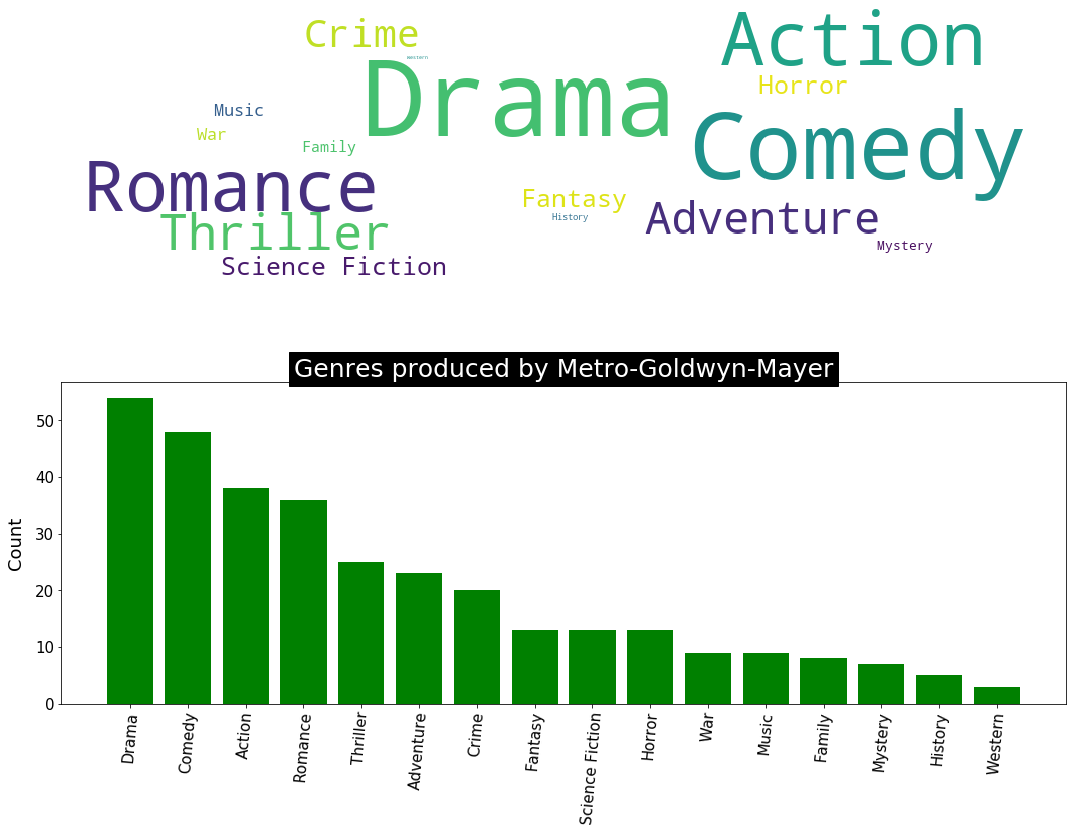

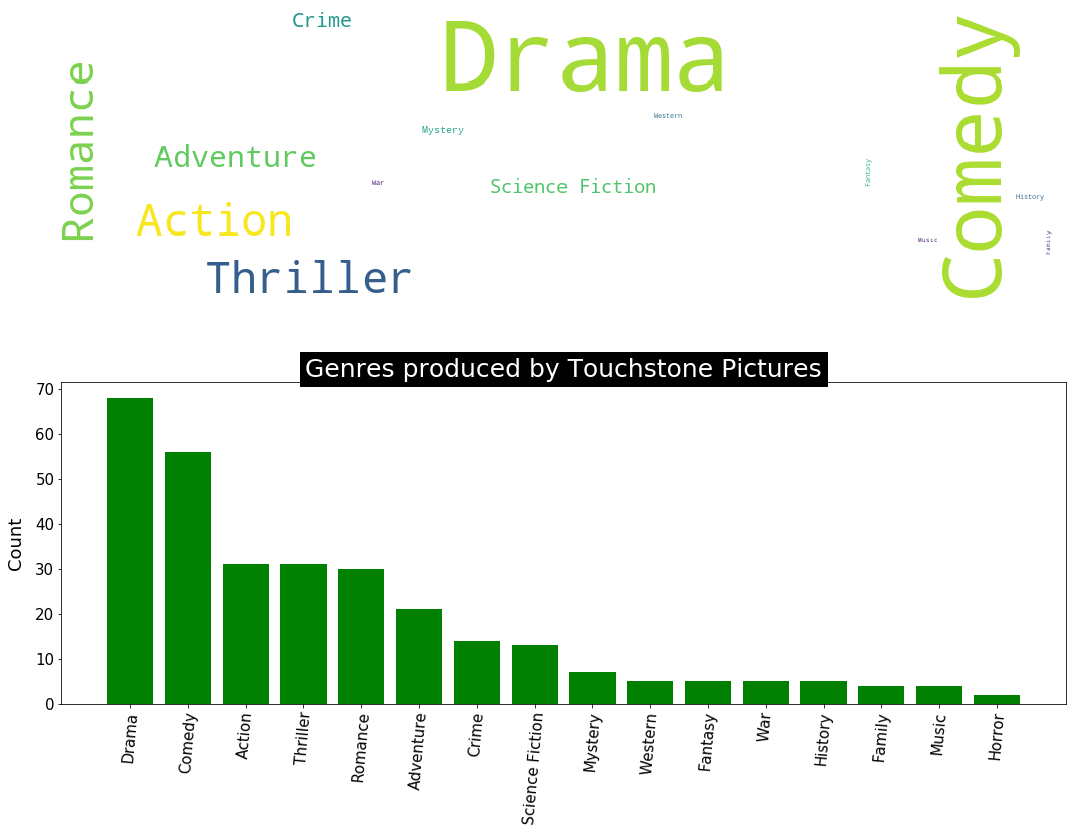

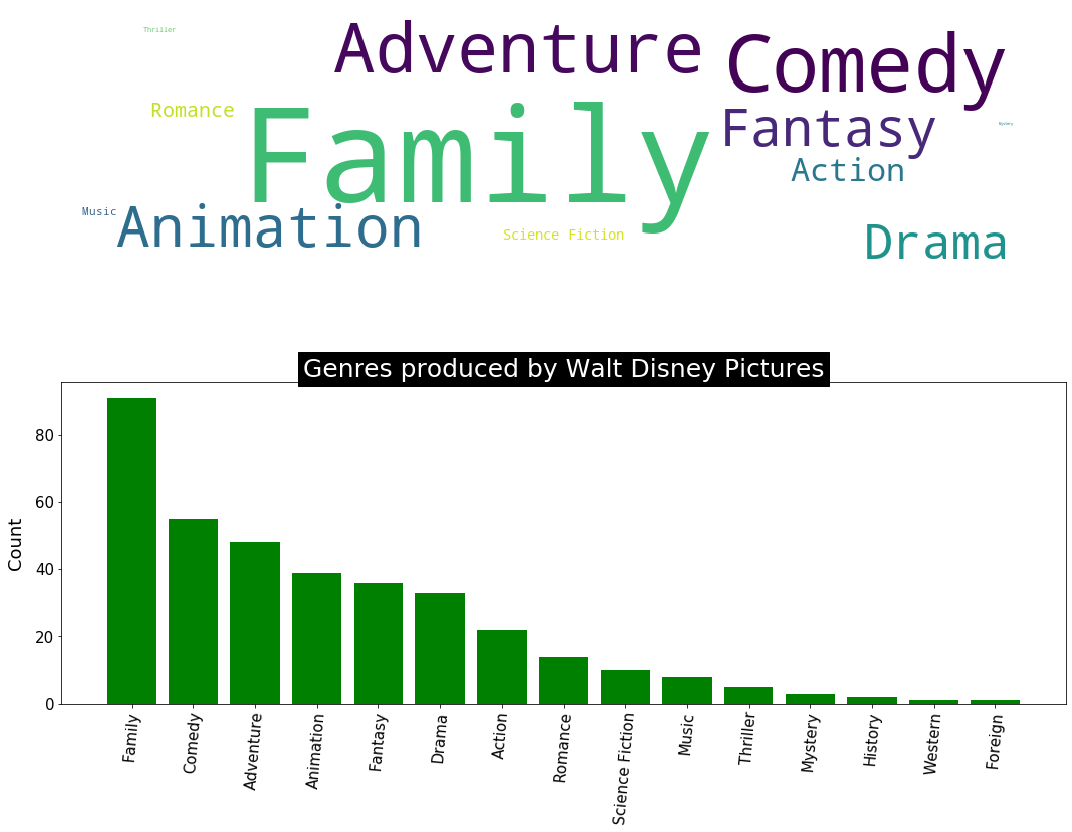

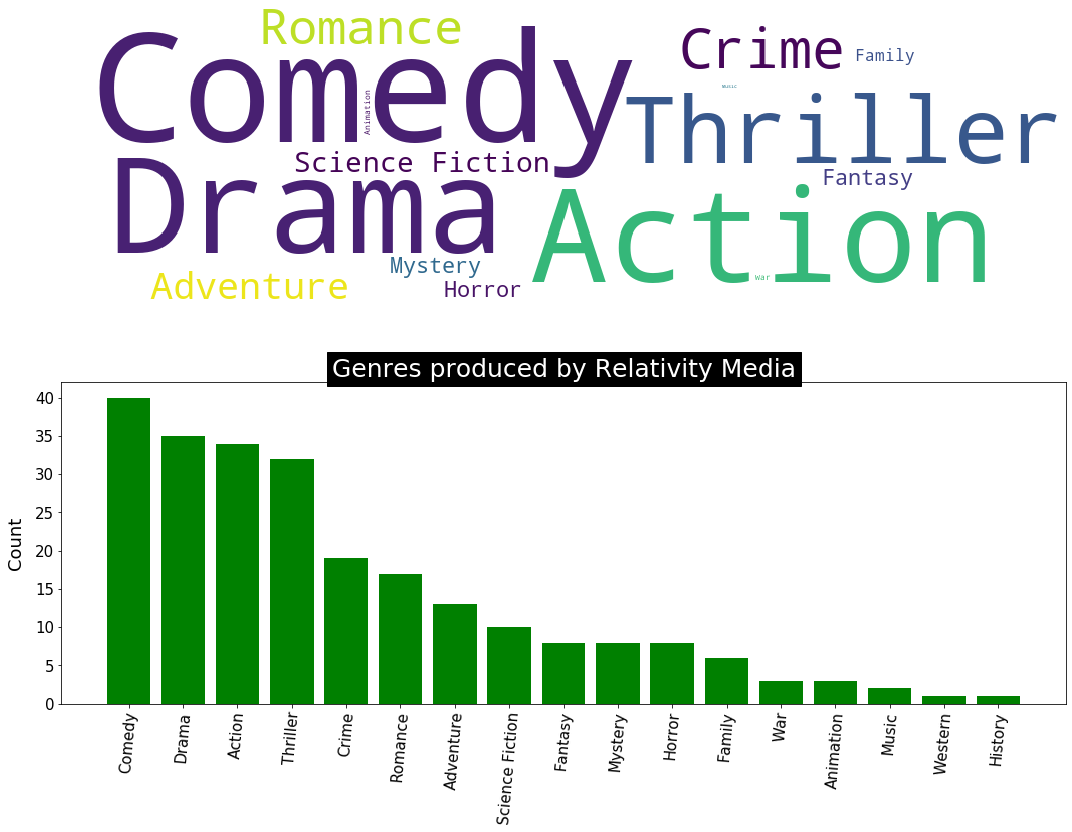

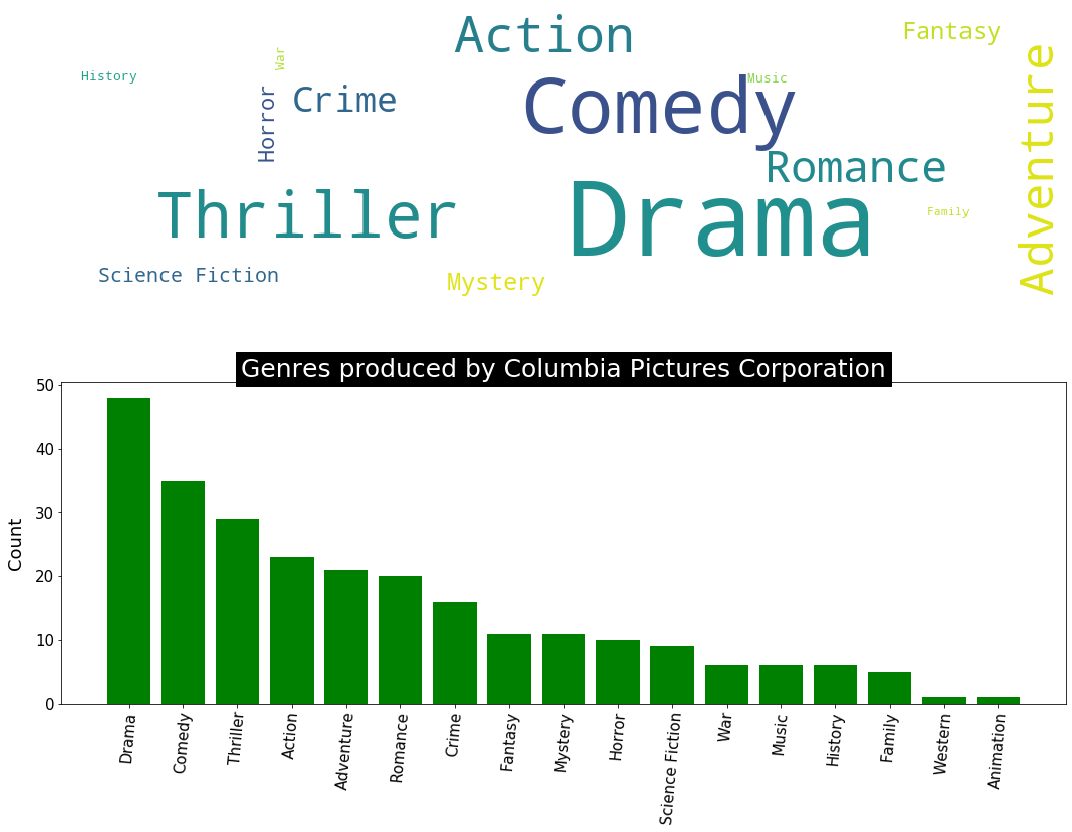

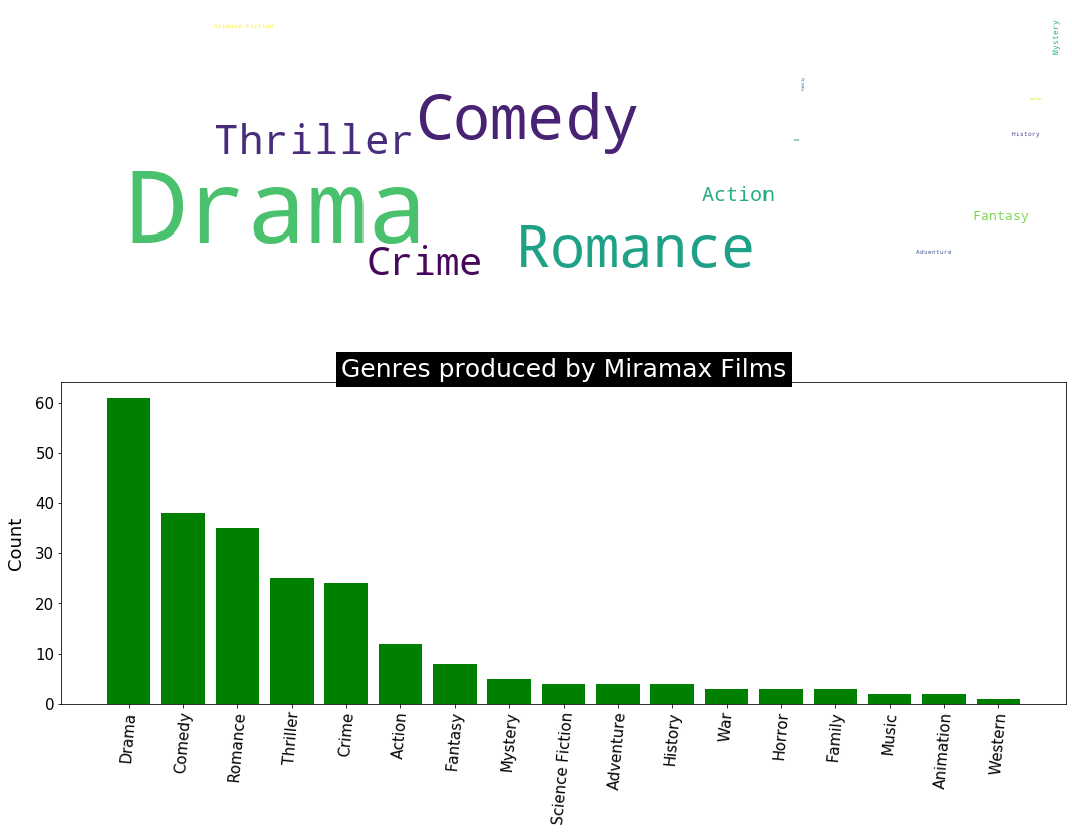

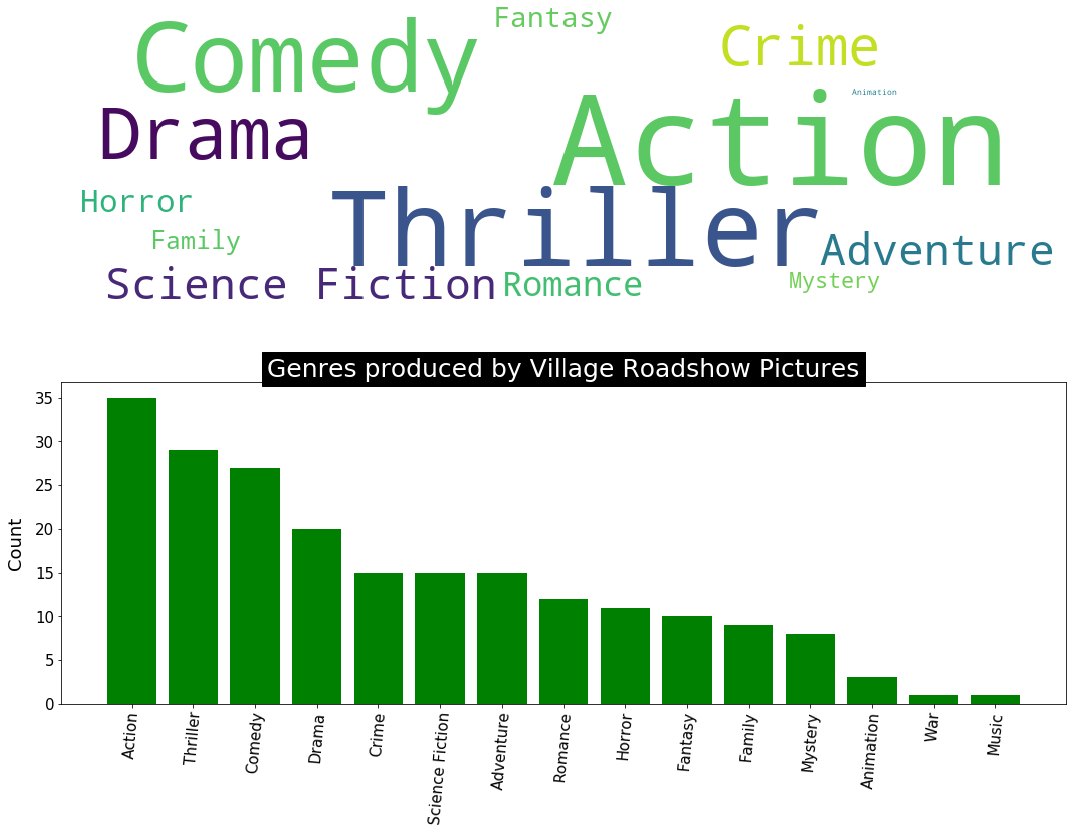

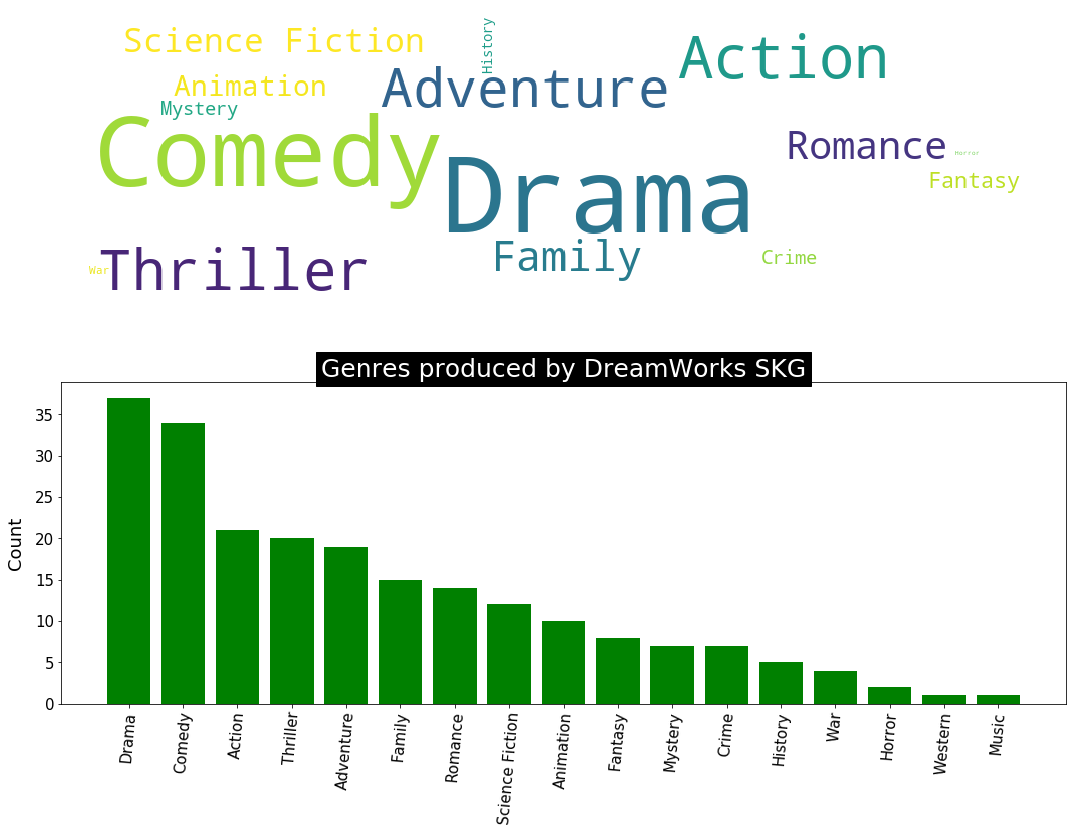

In [46]:
for i in ['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 
          'New Line Cinema', 'Metro-Goldwyn-Mayer', 'Touchstone Pictures', 'Walt Disney Pictures', 'Relativity Media', 
          'Columbia Pictures Corporation', 'Miramax Films', 'Village Roadshow Pictures', 'DreamWorks SKG']:
    show_plot_groupby(movie_copy,'genres','production_companies',i)

### Production Countries (Apart from US)

In [47]:
word_list, word_dict = count_word(movie_df, 'production_countries')
con_df = pd.DataFrame(word_list, columns=['country','num_movies'])
con_df['num_movies'].iloc[0] = 0

In [48]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### 15 Genre, Director, Company, Actor that generated the most revenue, used the most budget

In [54]:
def sum_col_by_gb_col(df, col, gb_col):
    list_word = make_set(df,gb_col)
    #make dict for count category
    keyword_count = dict()

    #fill dict key with words set default value to 0
    for i in list_word: keyword_count[i] = 0
    
    #loop all data from col and gb_col
    for col_val, gb_col_val in zip(df[col],df[gb_col]):
        #skip NaN
        if isinstance(gb_col_val, float): continue
        if gb_col_val == '': continue
            
        #loop all the category in one row
        for gb_key in gb_col_val.split(','):
            #add col values to gb_col category
            if gb_key in list_word:
                keyword_count[gb_key] += col_val
    #______________________________________________________________________
    
    # convert sort the dictionary return as list of tupples
    keyword_occurences = sorted(keyword_count.items(), key=lambda x:x[1], reverse=True)

    #return sorted list and unsorted dict
    temp_df = pd.DataFrame(keyword_occurences, columns=[gb_col, col]).head(15)
    plt.figure(figsize=(8,8))
    plt.xticks(rotation=90)
    sns.barplot(data=temp_df, x=gb_col, y=col)
    plt.show()

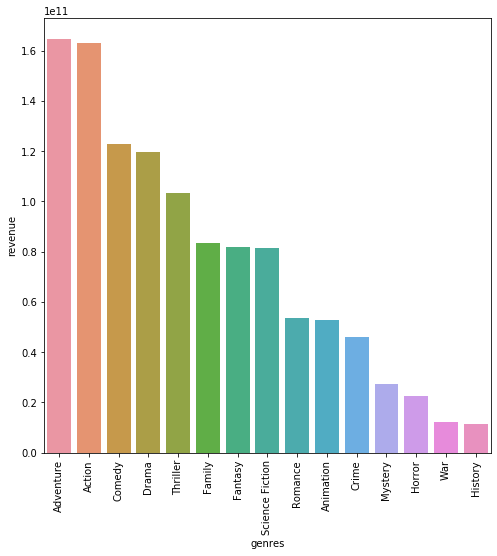

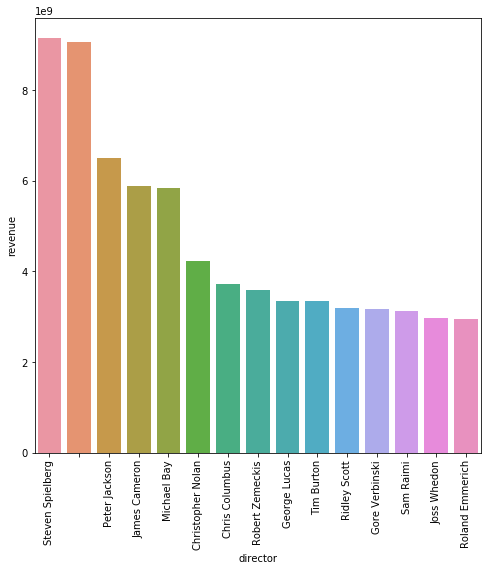

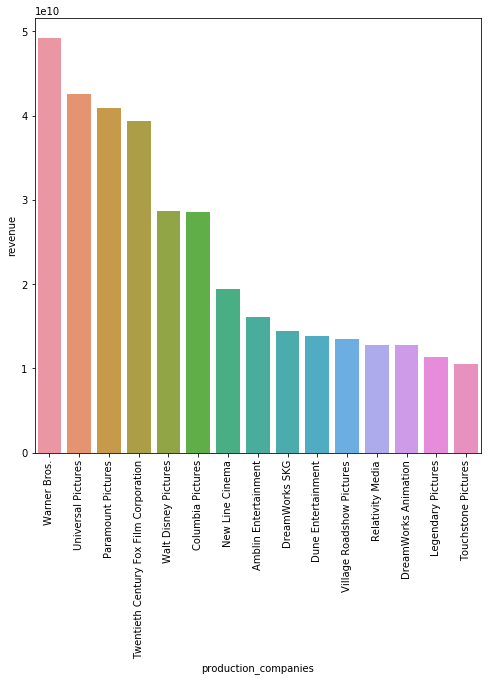

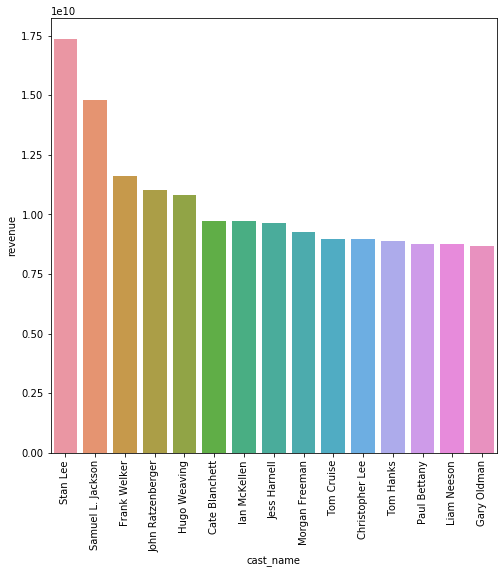

In [50]:
for i in ['genres', 'director', 'production_companies', 'cast_name']:
    sum_col_by_gb_col(movie_df, 'revenue', i)

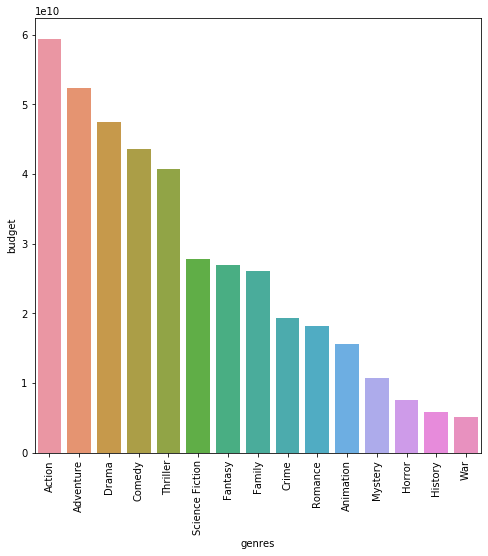

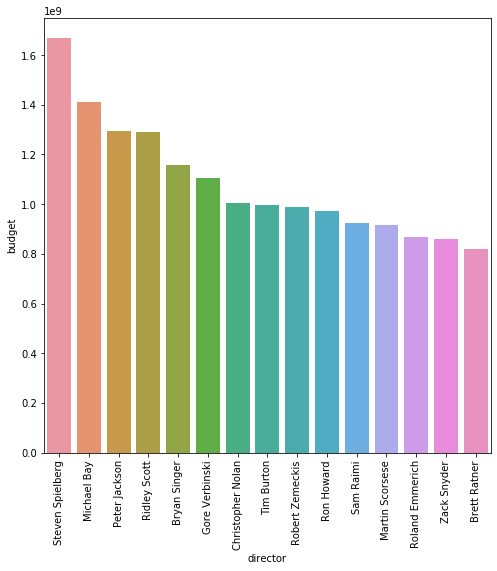

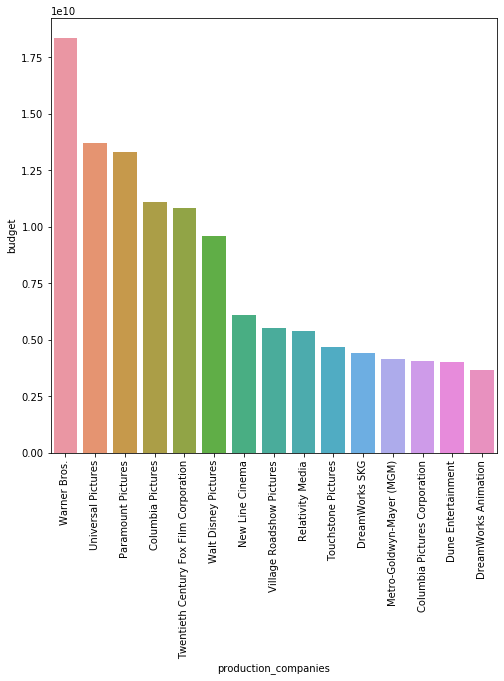

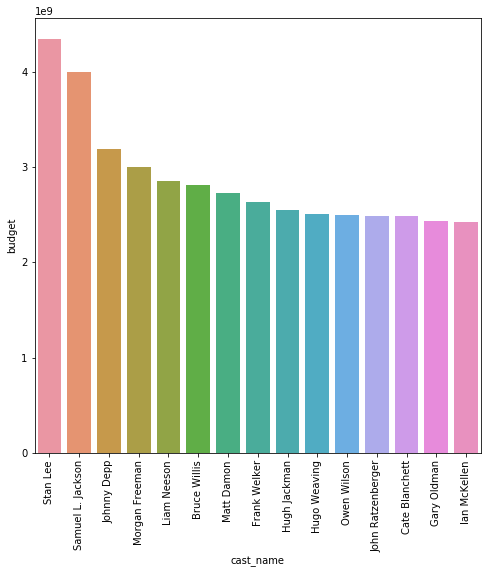

In [56]:
for i in ['genres', 'director', 'production_companies', 'cast_name']:
    sum_col_by_gb_col(movie_df, 'budget', i)

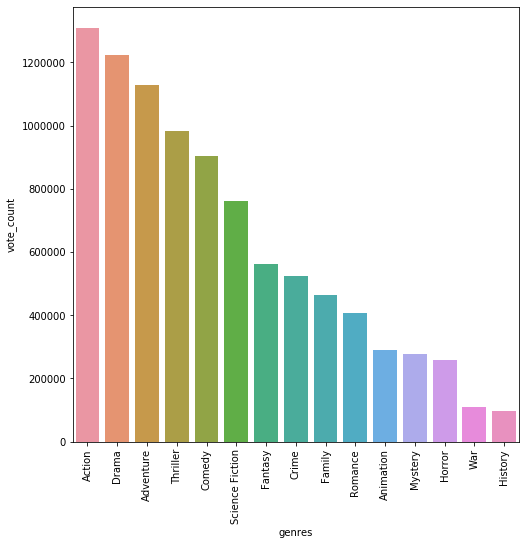

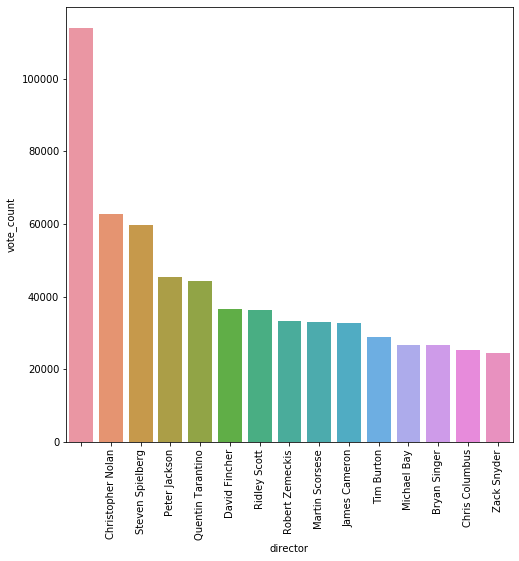

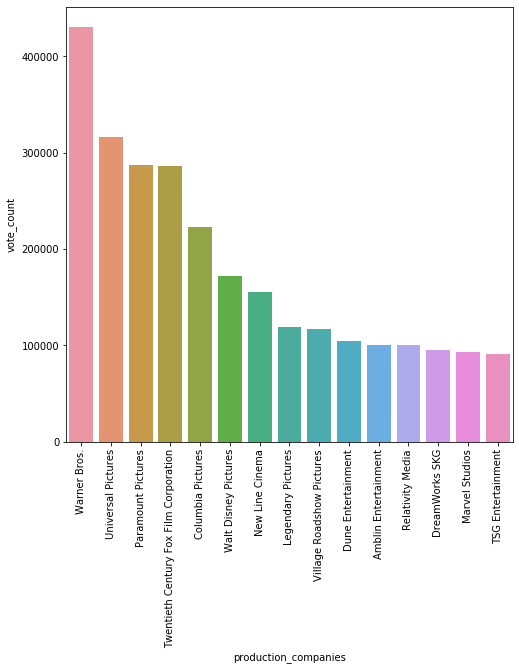

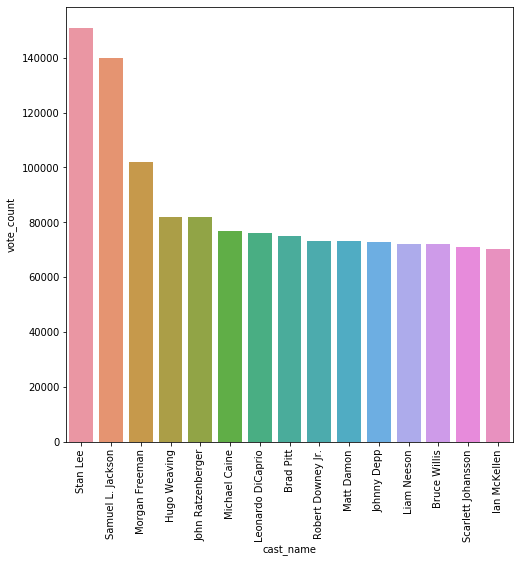

In [52]:
for i in ['genres', 'director', 'production_companies', 'cast_name']:
    sum_col_by_gb_col(movie_df, 'vote_count', i)

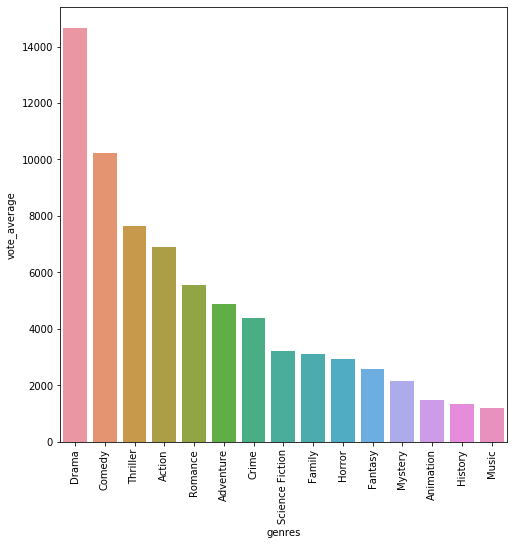

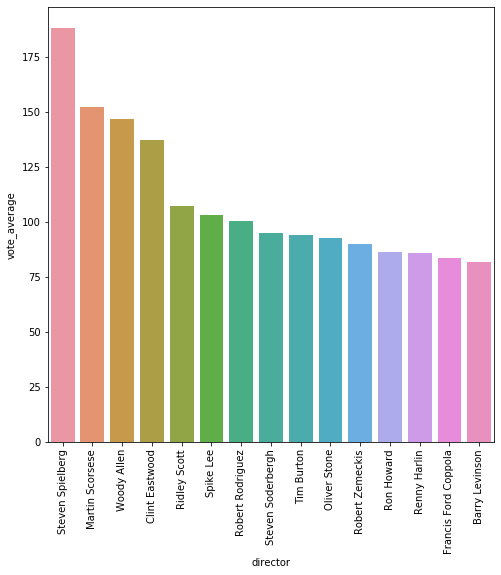

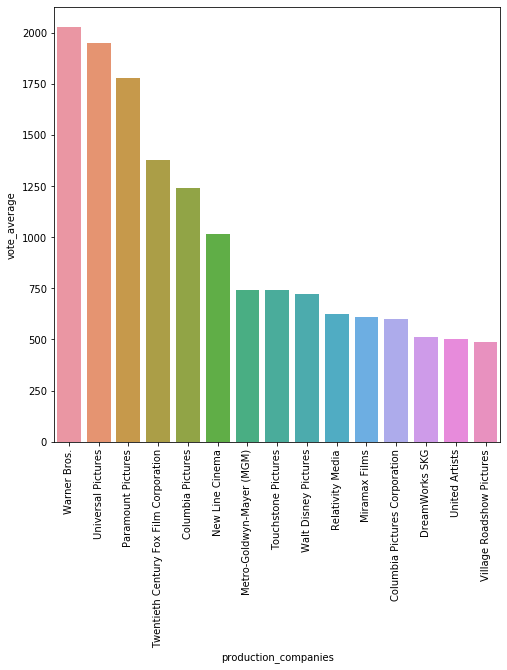

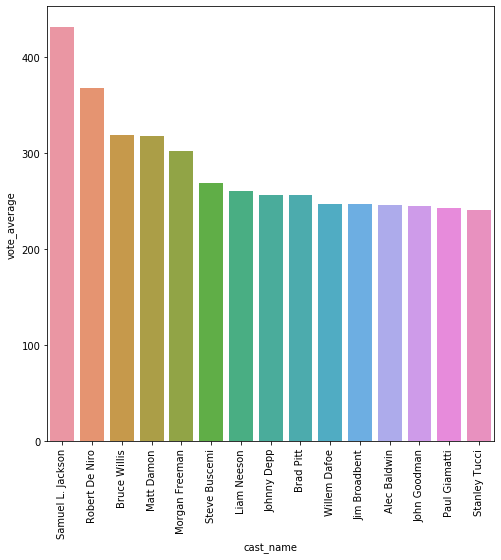

In [55]:
for i in ['genres', 'director', 'production_companies', 'cast_name']:
    sum_col_by_gb_col(movie_df, 'vote_average', i)